<a href="https://colab.research.google.com/github/PreyPython123/Master-V24-Semiveiledet-Regresjon/blob/Variabelunders%C3%B8kelse/Bioco_Variabelunders%C3%B8kelse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importeringer

Importering av nødvendige bibliotek og pakker

In [ ]:
!pip install hoggorm
!pip install hoggormPlot

In [ ]:
import pandas as pd
import numpy as np
import copy

import seaborn as sns
import matplotlib.pyplot as plt

import hoggorm as ho
import hoggormplot as hop

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

Importering av data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Velger første kolonne med dato og tid som index
behandlet_data = pd.read_csv('/content/drive/MyDrive/MasterV24/Bioco_data/ekstremverdi_data_behandlet_bioco_data.csv',
                             header=0,
                             sep=',',
                             index_col=0)

# Importerer rådata
rå_data = pd.read_csv('/content/drive/MyDrive/MasterV24/BiocoData.csv',
                      header=0,
                      sep=';',
                      index_col=0)

# Formatterer index til riktig format og datatype
behandlet_data.index = pd.to_datetime(behandlet_data.index,
                                      format='%Y-%m-%d %H:%M:%S')

rå_data.index = pd.to_datetime(rå_data.index,
                               format='%d-%m-%Y %H:%M:%S.%f')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Beskrivelse av behandlet datasett

In [ ]:
behandlet_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29047 entries, 2022-10-31 17:37:00 to 2023-06-14 01:05:00
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EnzymeType_A1   29047 non-null  int64  
 1   EnzymeType_A2   29047 non-null  int64  
 2   EnzymeType_B    29047 non-null  int64  
 3   EnzymeType_C    29047 non-null  int64  
 4   EnzymeType_D    29047 non-null  int64  
 5   EnzymeType_E    29047 non-null  int64  
 6   RawMatPercent   29047 non-null  float64
 7   NIRfat          29047 non-null  float64
 8   NIRash          29047 non-null  float64
 9   NIRwater        29047 non-null  float64
 10  TT08            29047 non-null  float64
 11  TT20            29047 non-null  float64
 12  TT12            29047 non-null  float64
 13  Collagen        87 non-null     float64
 14  Mw              458 non-null    float64
 15  SmallMolecules  458 non-null    float64
 16  BrixAdjusted    458 non-null    float64
d

# PCA

Legger tilbake kategoriske variabler for undersøkelse

In [ ]:
# Lager kopi av behandlet data
forklaring_data = copy.deepcopy(behandlet_data)

# Dropper responsvariabler
forklaring_data.drop(forklaring_data.columns[-4:], axis=1, inplace=True)

PCA analyse - Hoggorm

In [ ]:
# Navn på forklaringsvariabler
variabel_navn = list(forklaring_data.columns)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))])

forklaring_imputed = pipeline.fit_transform(forklaring_data)

# pca modell
pca_modell = ho.nipalsPCA(arrX=forklaring_imputed,
                          Xstand=True,
                          numComp=5)

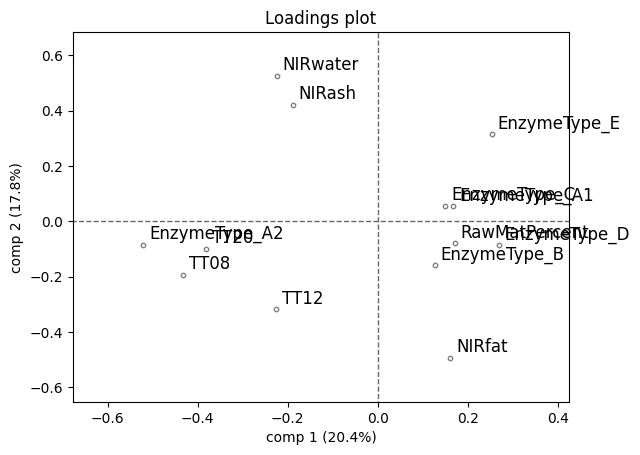

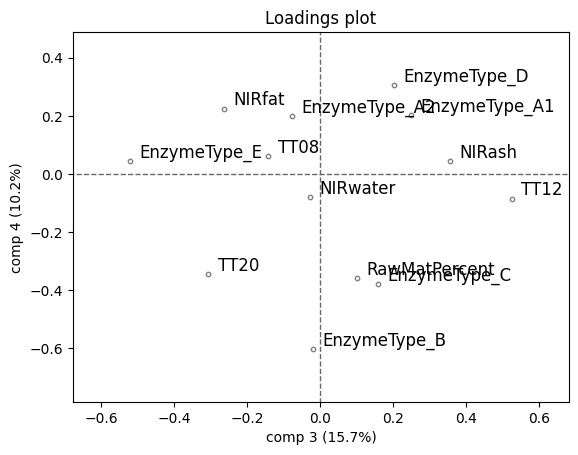

In [ ]:
# pca plot kompoenent 1 and 2
hop.plot(pca_modell, comp = [1,2],
         plots = [2],
         XvarNames=variabel_navn)

# pca plt komponent 3 and 4
hop.plot(pca_modell, comp = [3,4],
         plots = [2],
         XvarNames=variabel_navn)

# Dataforståelse av behandlet datasett

Informasjon om antall observasjoner for hver kolonne

In [ ]:
behandlet_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29047 entries, 2022-10-31 17:37:00 to 2023-06-14 01:05:00
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EnzymeType_A1   29047 non-null  int64  
 1   EnzymeType_A2   29047 non-null  int64  
 2   EnzymeType_B    29047 non-null  int64  
 3   EnzymeType_C    29047 non-null  int64  
 4   EnzymeType_D    29047 non-null  int64  
 5   EnzymeType_E    29047 non-null  int64  
 6   RawMatPercent   29047 non-null  float64
 7   NIRfat          29047 non-null  float64
 8   NIRash          29047 non-null  float64
 9   NIRwater        29047 non-null  float64
 10  TT08            29047 non-null  float64
 11  TT20            29047 non-null  float64
 12  TT12            29047 non-null  float64
 13  Collagen        87 non-null     float64
 14  Mw              458 non-null    float64
 15  SmallMolecules  458 non-null    float64
 16  BrixAdjusted    458 non-null    float64
d

## Fordeling i variabler i behandlet datasett

Lager kopi for merinformasjon om tid og enzymtype

In [ ]:
# Legger til uke og dagsinformasjon
behandlet_data_tid = copy.deepcopy(behandlet_data)
behandlet_data_tid['Week'] = behandlet_data.index.isocalendar().week
behandlet_data_tid['Day'] = (behandlet_data_tid.index.isocalendar().day)

# Enzymtyper
enzym_data = rå_data.merge(behandlet_data_tid,
                                left_index=True,
                                right_index=True,
                                how='inner',
                                suffixes=('','_drop'))['EnzymeCode']

# Legger til enzymtypeinformasjon og ekskluderer "labelancodet"-kolonner for
# enzymer
behandlet_data_tid = pd.concat([behandlet_data_tid, enzym_data], axis=1)
behandlet_data_tid = behandlet_data_tid.iloc[:, 6:]

Fordeling i variablene for hele datasettet med uke- og dagsinformasjon

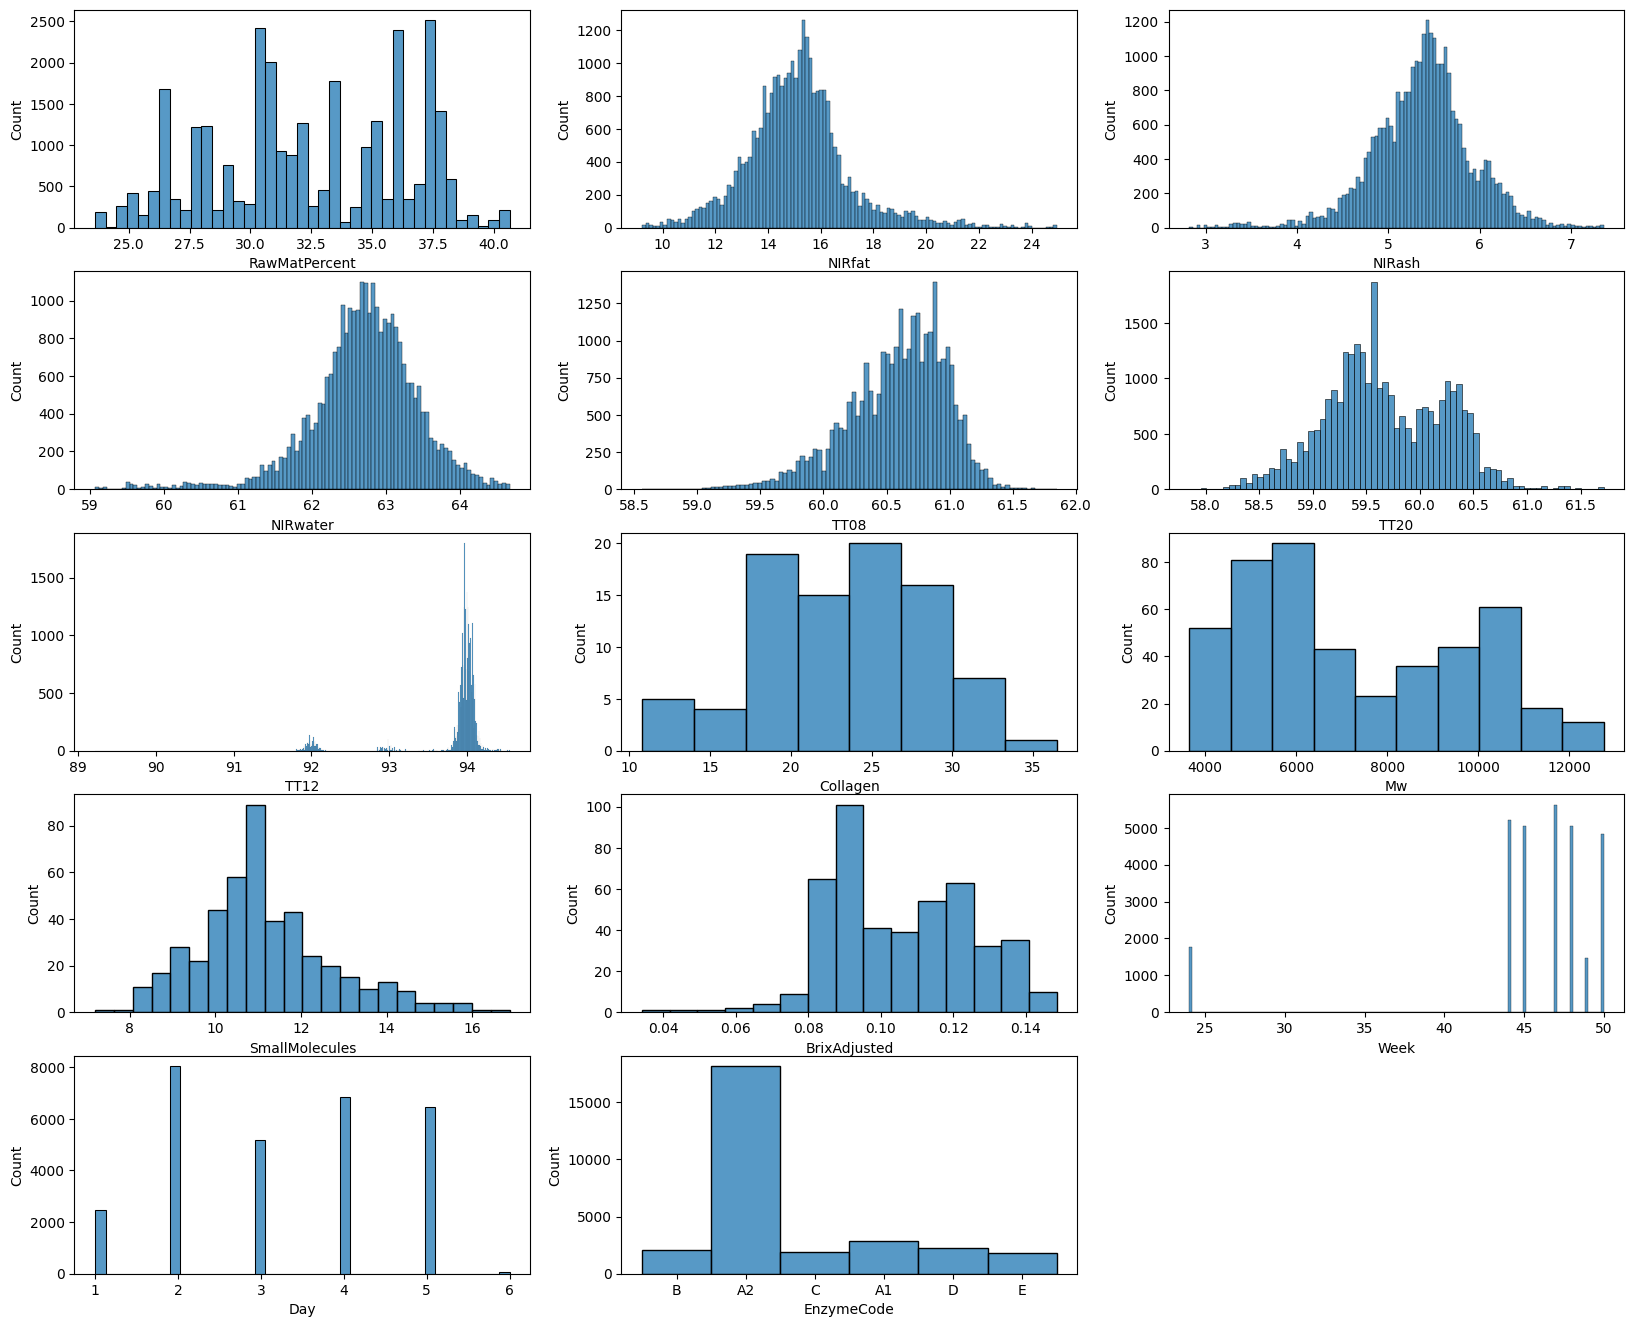

In [ ]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(behandlet_data_tid.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), behandlet_data_tid):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = behandlet_data_tid)
  i += 1

Fordeling av Enzymtyper i hele datasett

In [ ]:
# Fordelingen i "EnzymeCode"

frekvens = behandlet_data_tid['EnzymeCode'].value_counts()
andel = behandlet_data_tid['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2     18145  62.467725
A1      2845   9.794471
D       2256   7.766723
B       2113   7.274417
C       1916   6.596206
E       1772   6.100458


Fordeling i markert del av datasettet

In [ ]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_markert = behandlet_data_tid.dropna(subset=['Collagen'])

# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_markert = behandlet_data_tid.dropna(subset=['Mw',
                                                          'SmallMolecules',
                                                          'BrixAdjusted'])

Fordeling i datasett med Collagen som markert respons

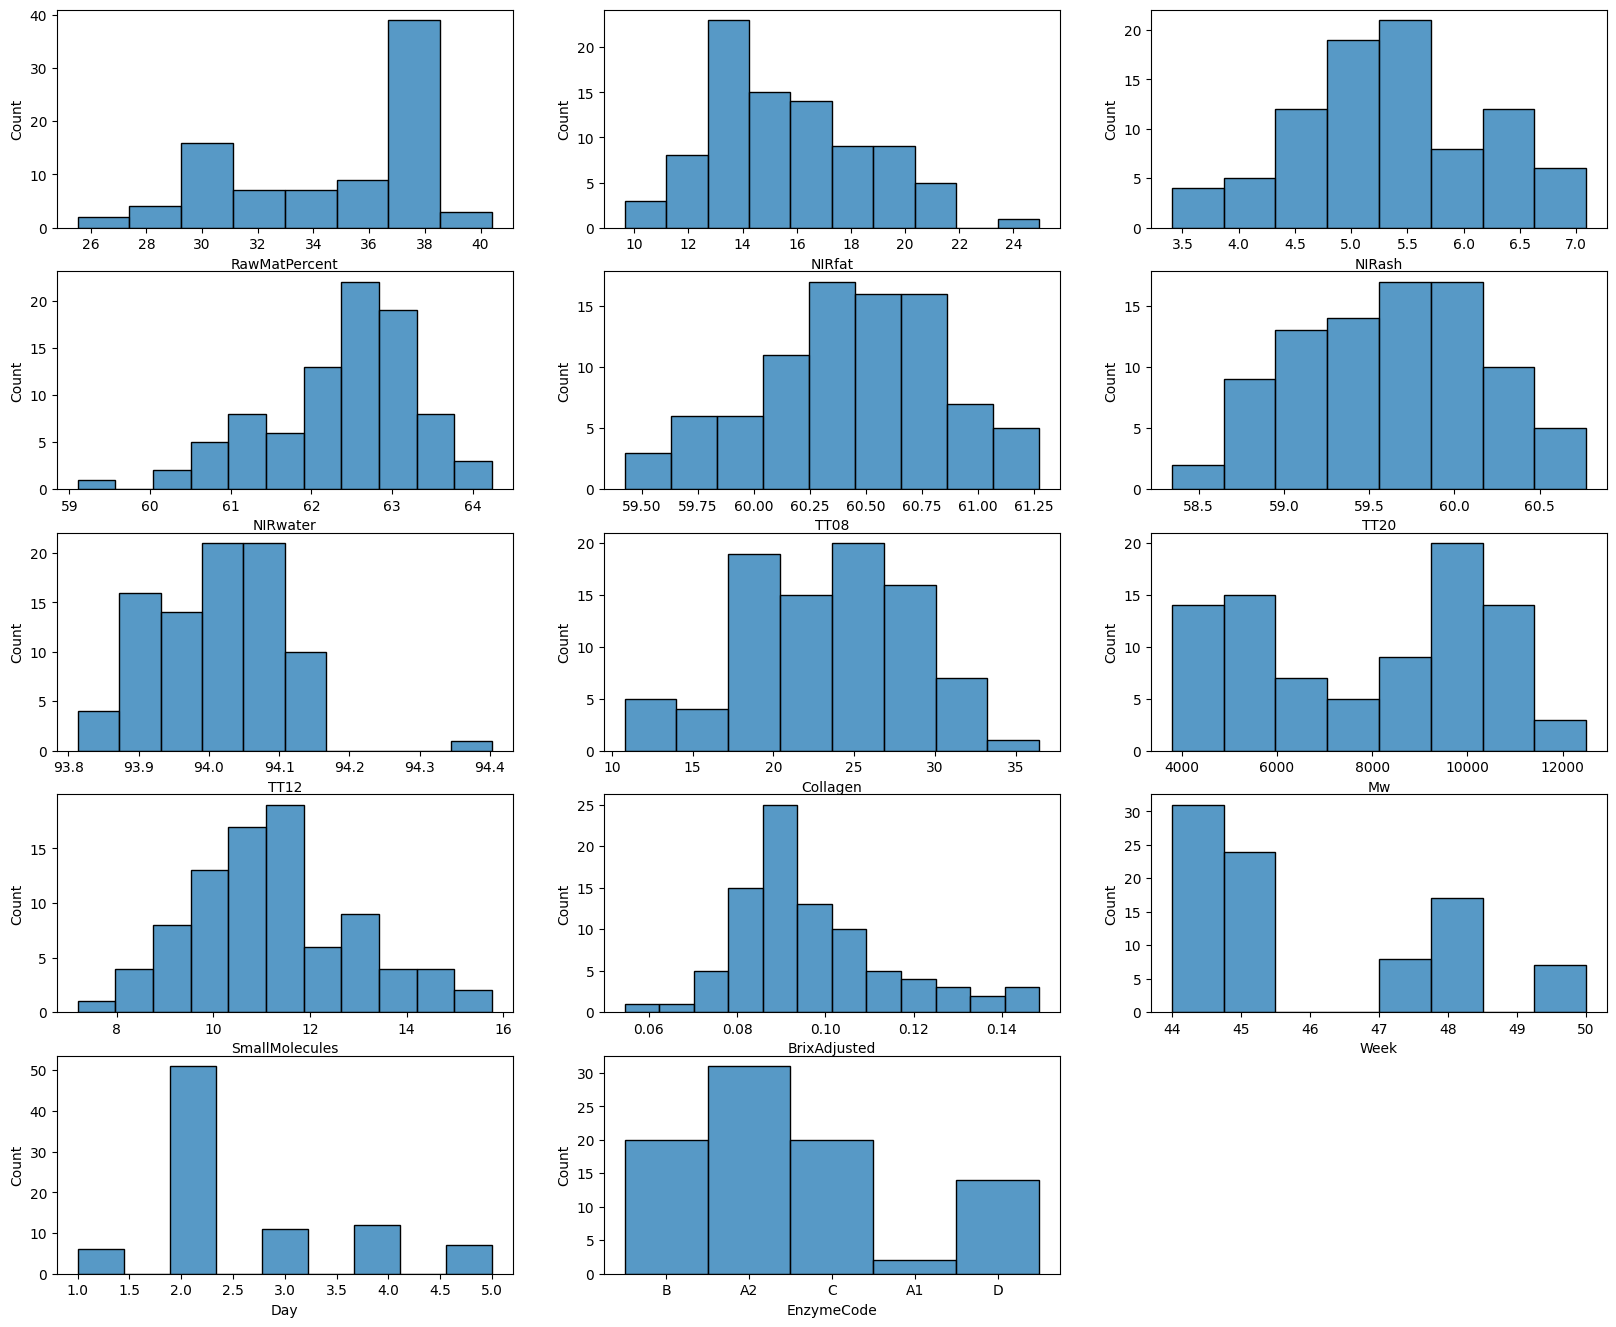

In [ ]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(collagen_markert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_markert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = collagen_markert)
  i += 1

Fordeling av Enzymtyper i datasett med Collagen som respons

In [ ]:
# Fordelingen i "EnzymeCode"

frekvens = collagen_markert['EnzymeCode'].value_counts()
andel = collagen_markert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2        31  35.632184
B         20  22.988506
C         20  22.988506
D         14  16.091954
A1         2   2.298851


Fordeling i datasett med resterende kvalitetsmålinger som markert respons

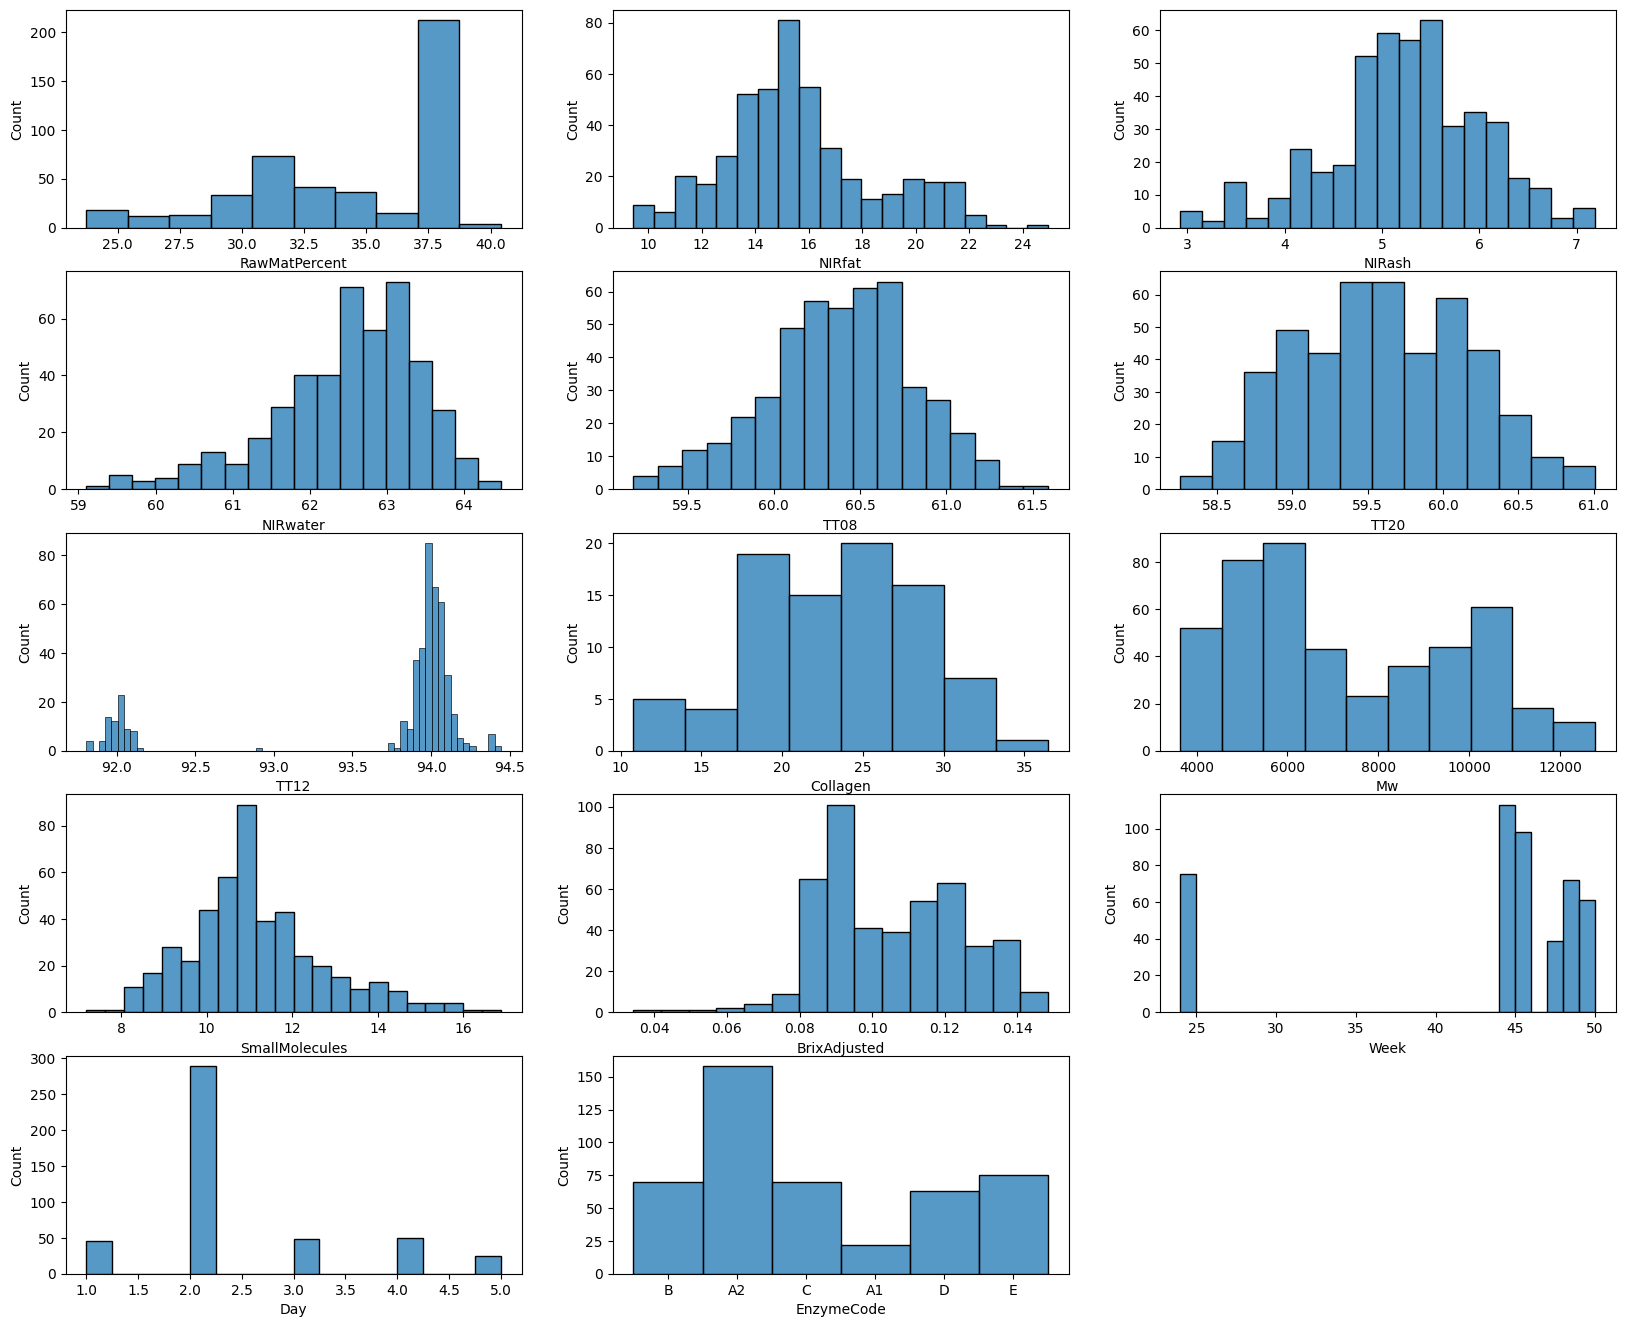

In [ ]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(kvalitetsmålinger_markert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_markert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = kvalitetsmålinger_markert)
  i += 1

Fordeling av Enzymtyper i datasett med andre kvalitetsmålinger som respons

In [ ]:
# Fordelingen i "EnzymeCode"

frekvens = kvalitetsmålinger_markert['EnzymeCode'].value_counts()
andel = kvalitetsmålinger_markert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2       158  34.497817
E         75  16.375546
B         70  15.283843
C         70  15.283843
D         63  13.755459
A1        22   4.803493


Fordeling i umarkert del av datasettet

In [ ]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_umarkert = behandlet_data_tid[behandlet_data_tid['Collagen'].isna()]


# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_umarkert = behandlet_data_tid[behandlet_data_tid['Mw'].isna()]

Fordeling i datasett med Collagen som markert respons

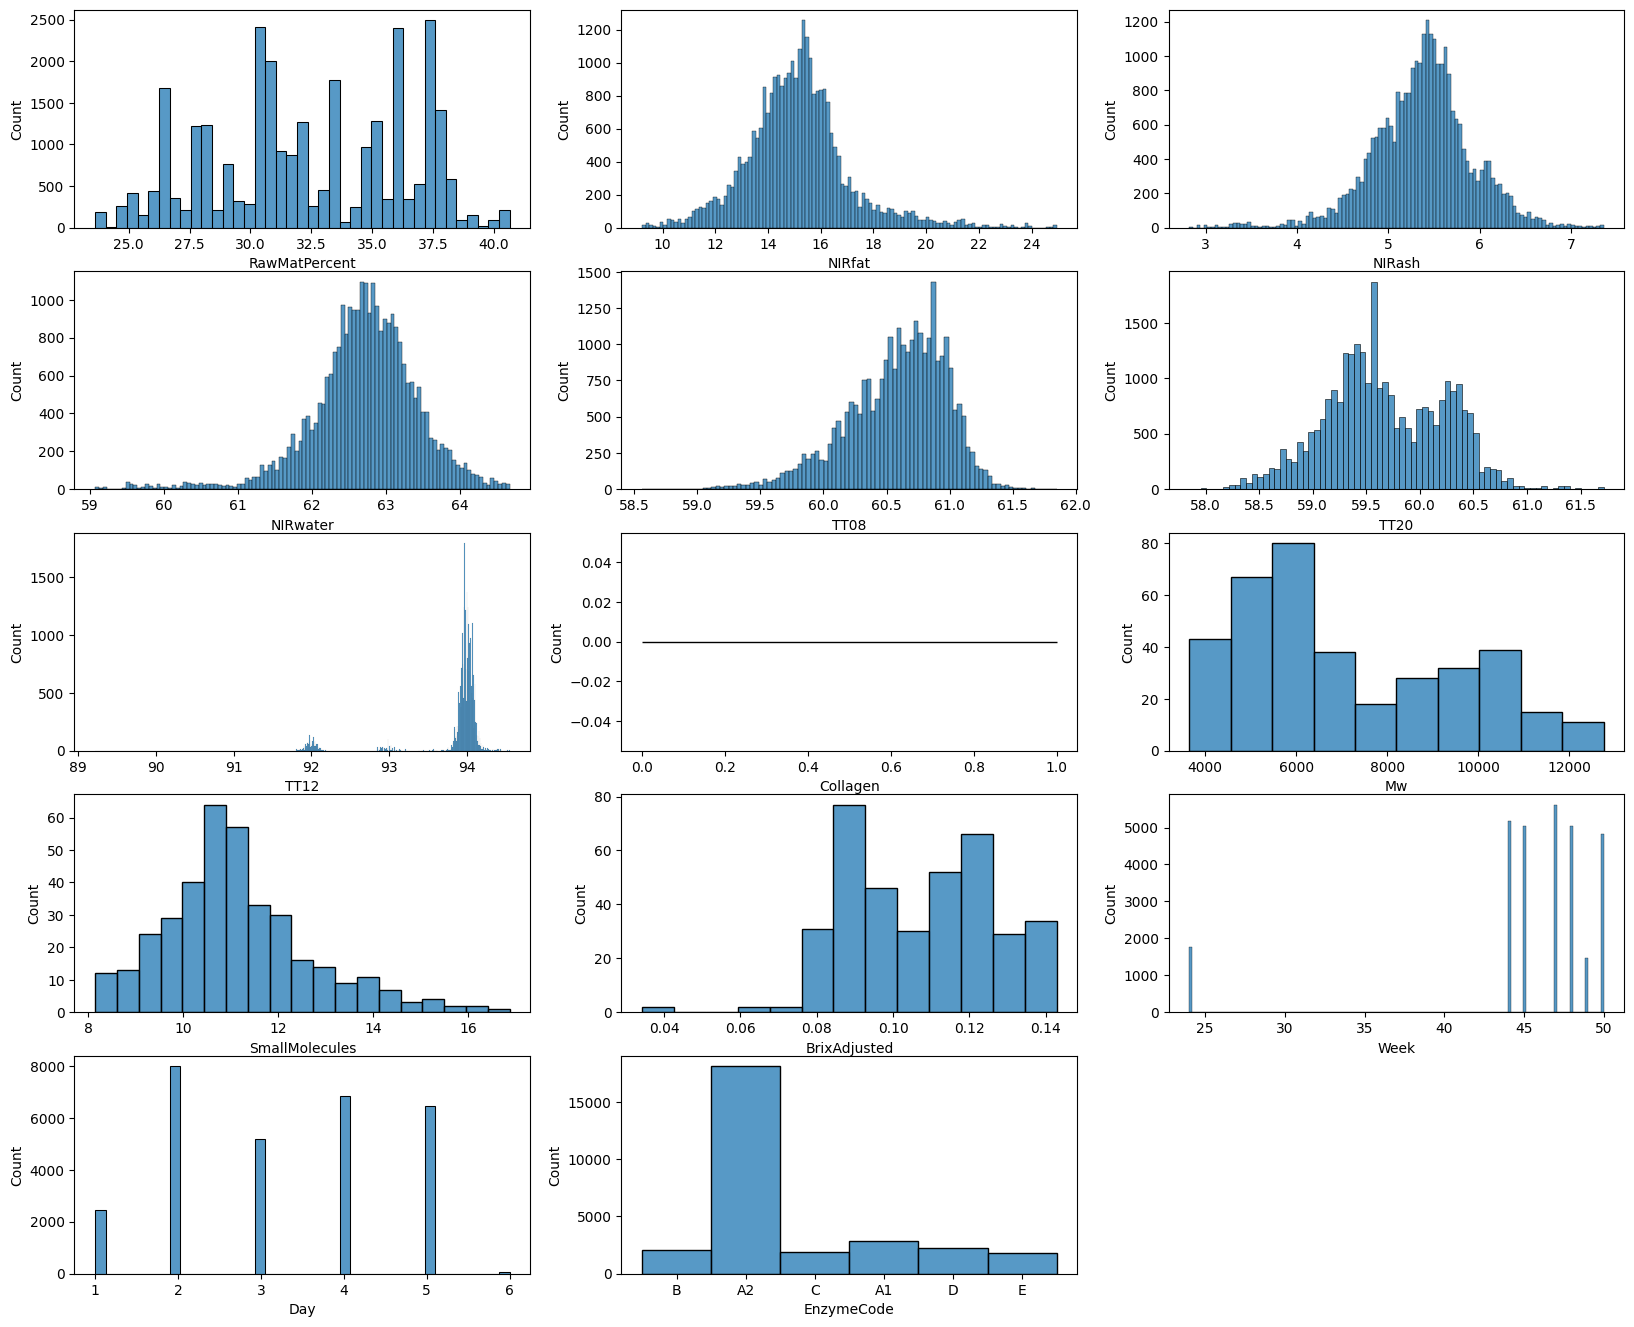

In [ ]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(collagen_umarkert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_umarkert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = collagen_umarkert)
  i += 1

Fordeling av Enzymtyper i datasett med Collagen som umarkert respons

In [ ]:
# Fordelingen i "EnzymeCode"

frekvens = collagen_umarkert['EnzymeCode'].value_counts()
andel = collagen_umarkert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2     18114  62.548343
A1      2843   9.816989
D       2242   7.741713
B       2093   7.227210
C       1896   6.546961
E       1772   6.118785


Fordeling i datasett med resterende kvalitetsmålinger som markert respons

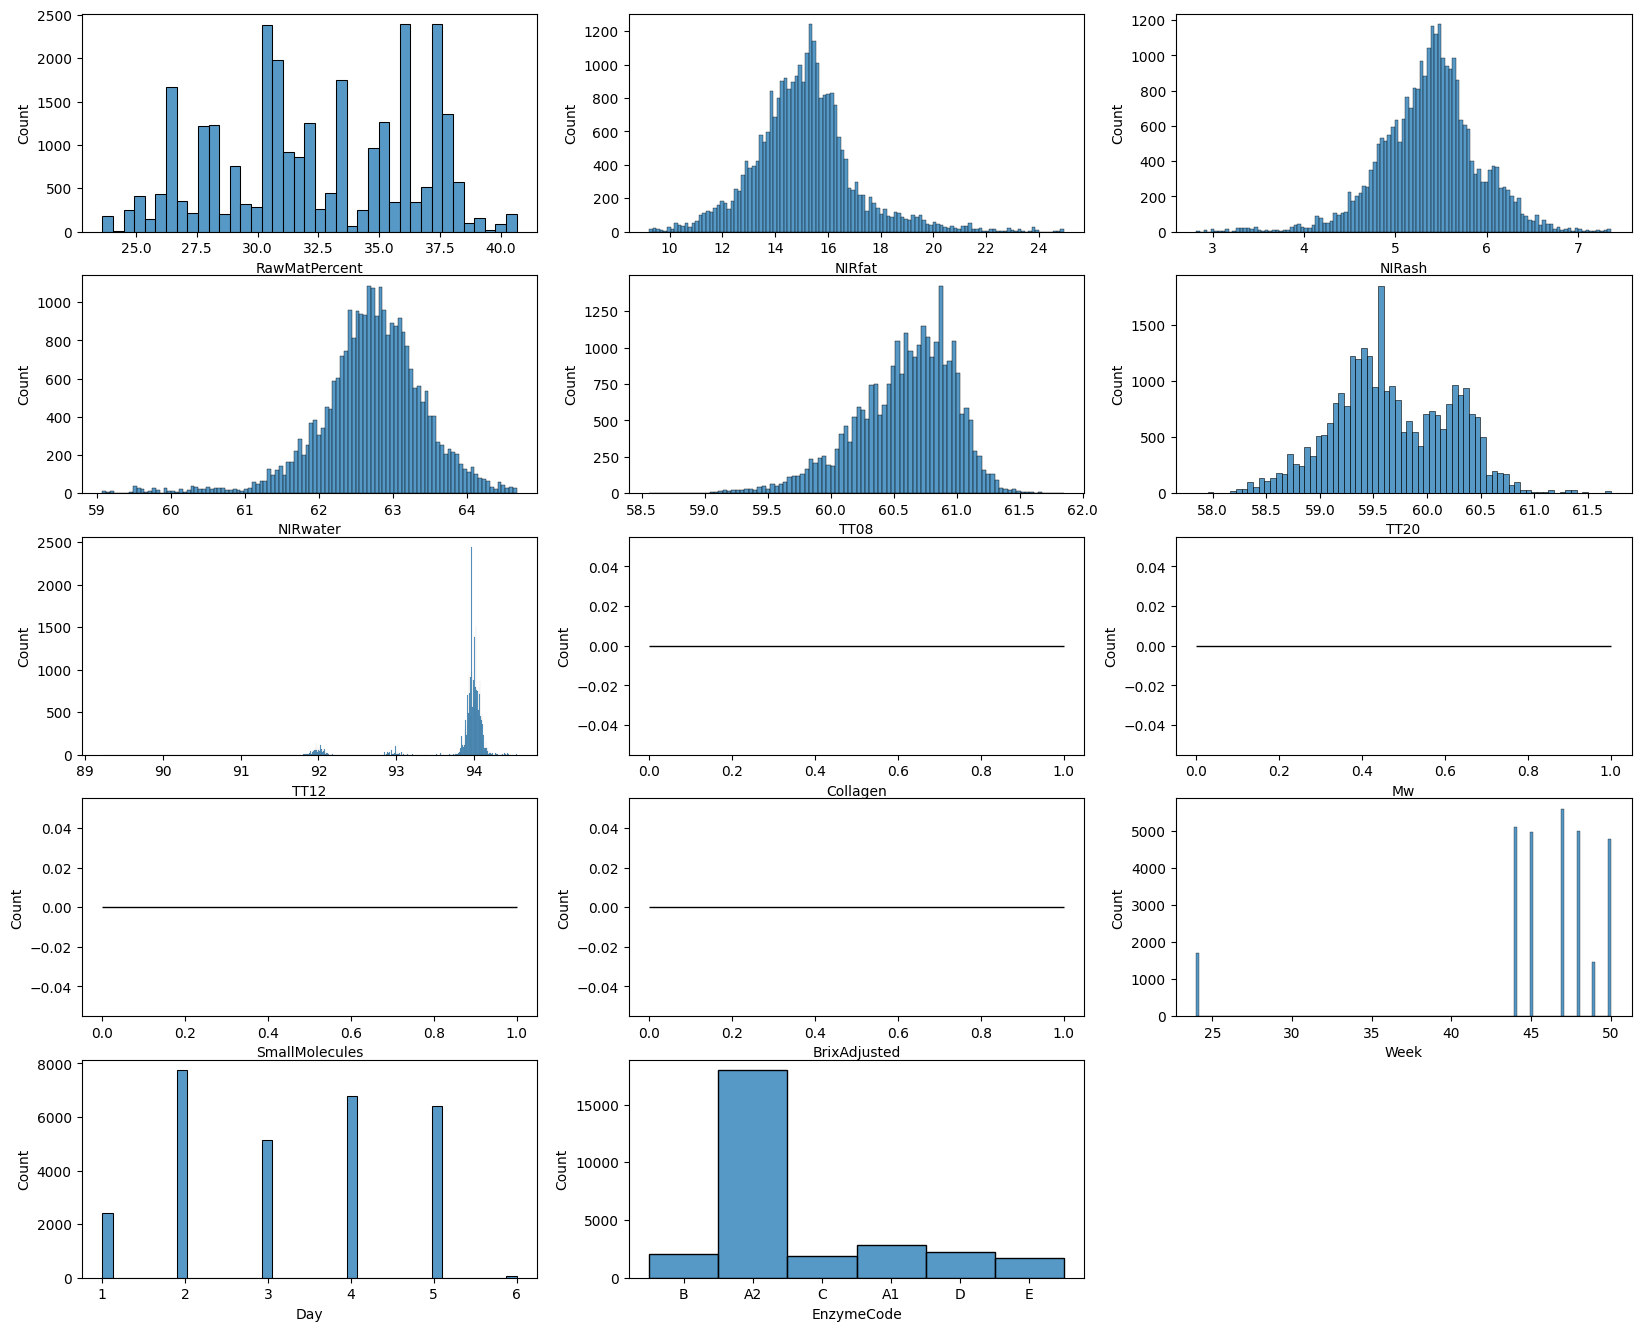

In [ ]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(kvalitetsmålinger_umarkert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_umarkert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = kvalitetsmålinger_umarkert)
  i += 1

Fordeling av Enzymtyper i datasett med andre kvalitetsmålinger som umarkert respons

In [ ]:
# Fordelingen i "EnzymeCode"

frekvens = kvalitetsmålinger_umarkert['EnzymeCode'].value_counts()
andel = kvalitetsmålinger_umarkert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2     17987  62.915807
A1      2823   9.874427
D       2193   7.670782
B       2043   7.146105
C       1846   6.457029
E       1697   5.935849


## Korrelasjon

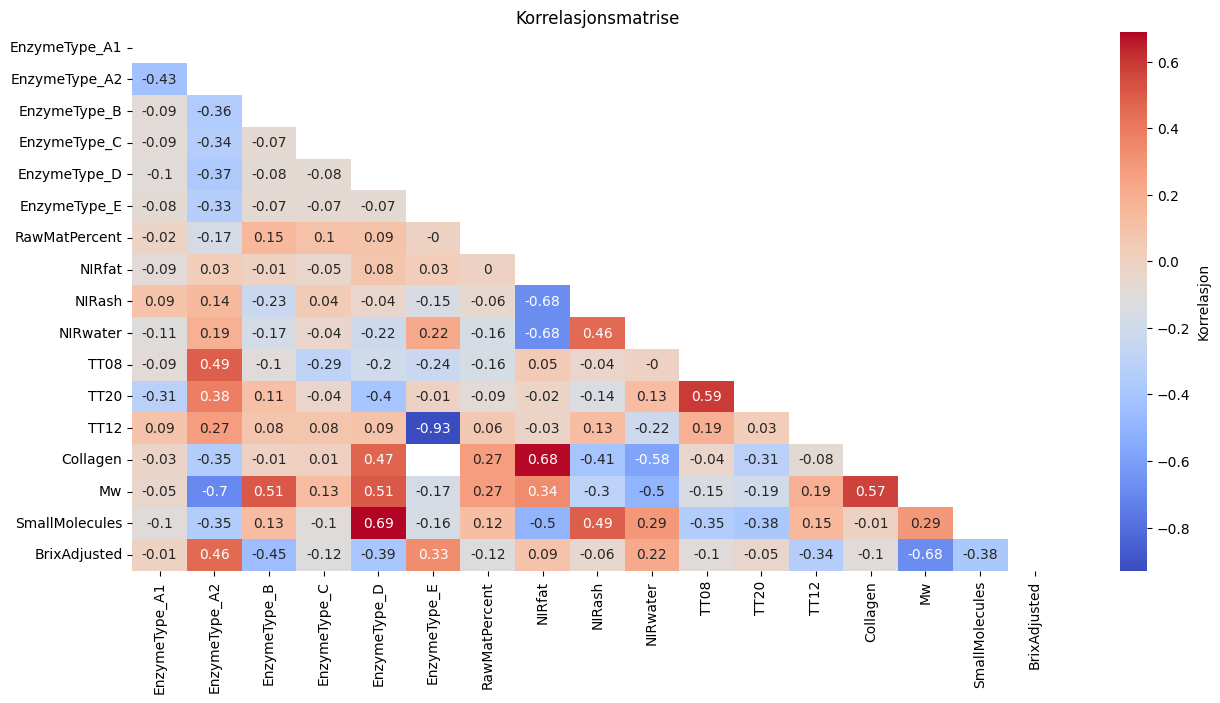

In [ ]:
# Lager en korrelasjonsmatrise med annotering
korrelasjon_matrise = behandlet_data.corr()

# Runder av til 2 desimaler for bedre lesbarhet
korrelasjon_matrise_avrundet = korrelasjon_matrise.round(2)

# Triangulær matrise
maske = np.triu(np.ones_like(korrelasjon_matrise_avrundet,
                             dtype=bool))

plt.figure(figsize=(15, 7))
sns.heatmap(korrelasjon_matrise_avrundet,
            annot=True,
            mask=maske,
            cmap='coolwarm',
            cbar_kws={'label': 'Korrelasjon'})
plt.title("Korrelasjonsmatrise")
plt.show()

# Dataforståelse av behandlet datasett: Normal produksjon

Oppdeling av data for hver kvalitetsmåling under normal produksjon

In [ ]:
behandlet_data_normalprod = copy.deepcopy(behandlet_data)
behandlet_data_normalprod['Day'] = (behandlet_data_normalprod.index.isocalendar().day)

# Ekskluderer de dager med "design"-produksjon
behandlet_data_normalprod = behandlet_data_normalprod[~behandlet_data_normalprod['Day'].isin([1,2])]

enzym_data = rå_data.merge(behandlet_data_normalprod,
                                left_index=True,
                                right_index=True,
                                how='inner',
                                suffixes=('','_drop'))['EnzymeCode']

behandlet_data_normalprod_enzym = pd.concat([behandlet_data_normalprod, enzym_data], axis=1)
behandlet_data_normalprod_enzym = behandlet_data_normalprod_enzym.iloc[:, 6:]

In [ ]:
behandlet_data_normalprod_enzym.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18541 entries, 2022-11-02 00:00:00 to 2023-06-14 01:05:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RawMatPercent   18541 non-null  float64
 1   NIRfat          18541 non-null  float64
 2   NIRash          18541 non-null  float64
 3   NIRwater        18541 non-null  float64
 4   TT08            18541 non-null  float64
 5   TT20            18541 non-null  float64
 6   TT12            18541 non-null  float64
 7   Collagen        30 non-null     float64
 8   Mw              123 non-null    float64
 9   SmallMolecules  123 non-null    float64
 10  BrixAdjusted    123 non-null    float64
 11  Day             18541 non-null  UInt32 
 12  EnzymeCode      18541 non-null  object 
dtypes: UInt32(1), float64(11), object(1)
memory usage: 2.4+ MB


Fordeling i variablene datasett med normal produksjon

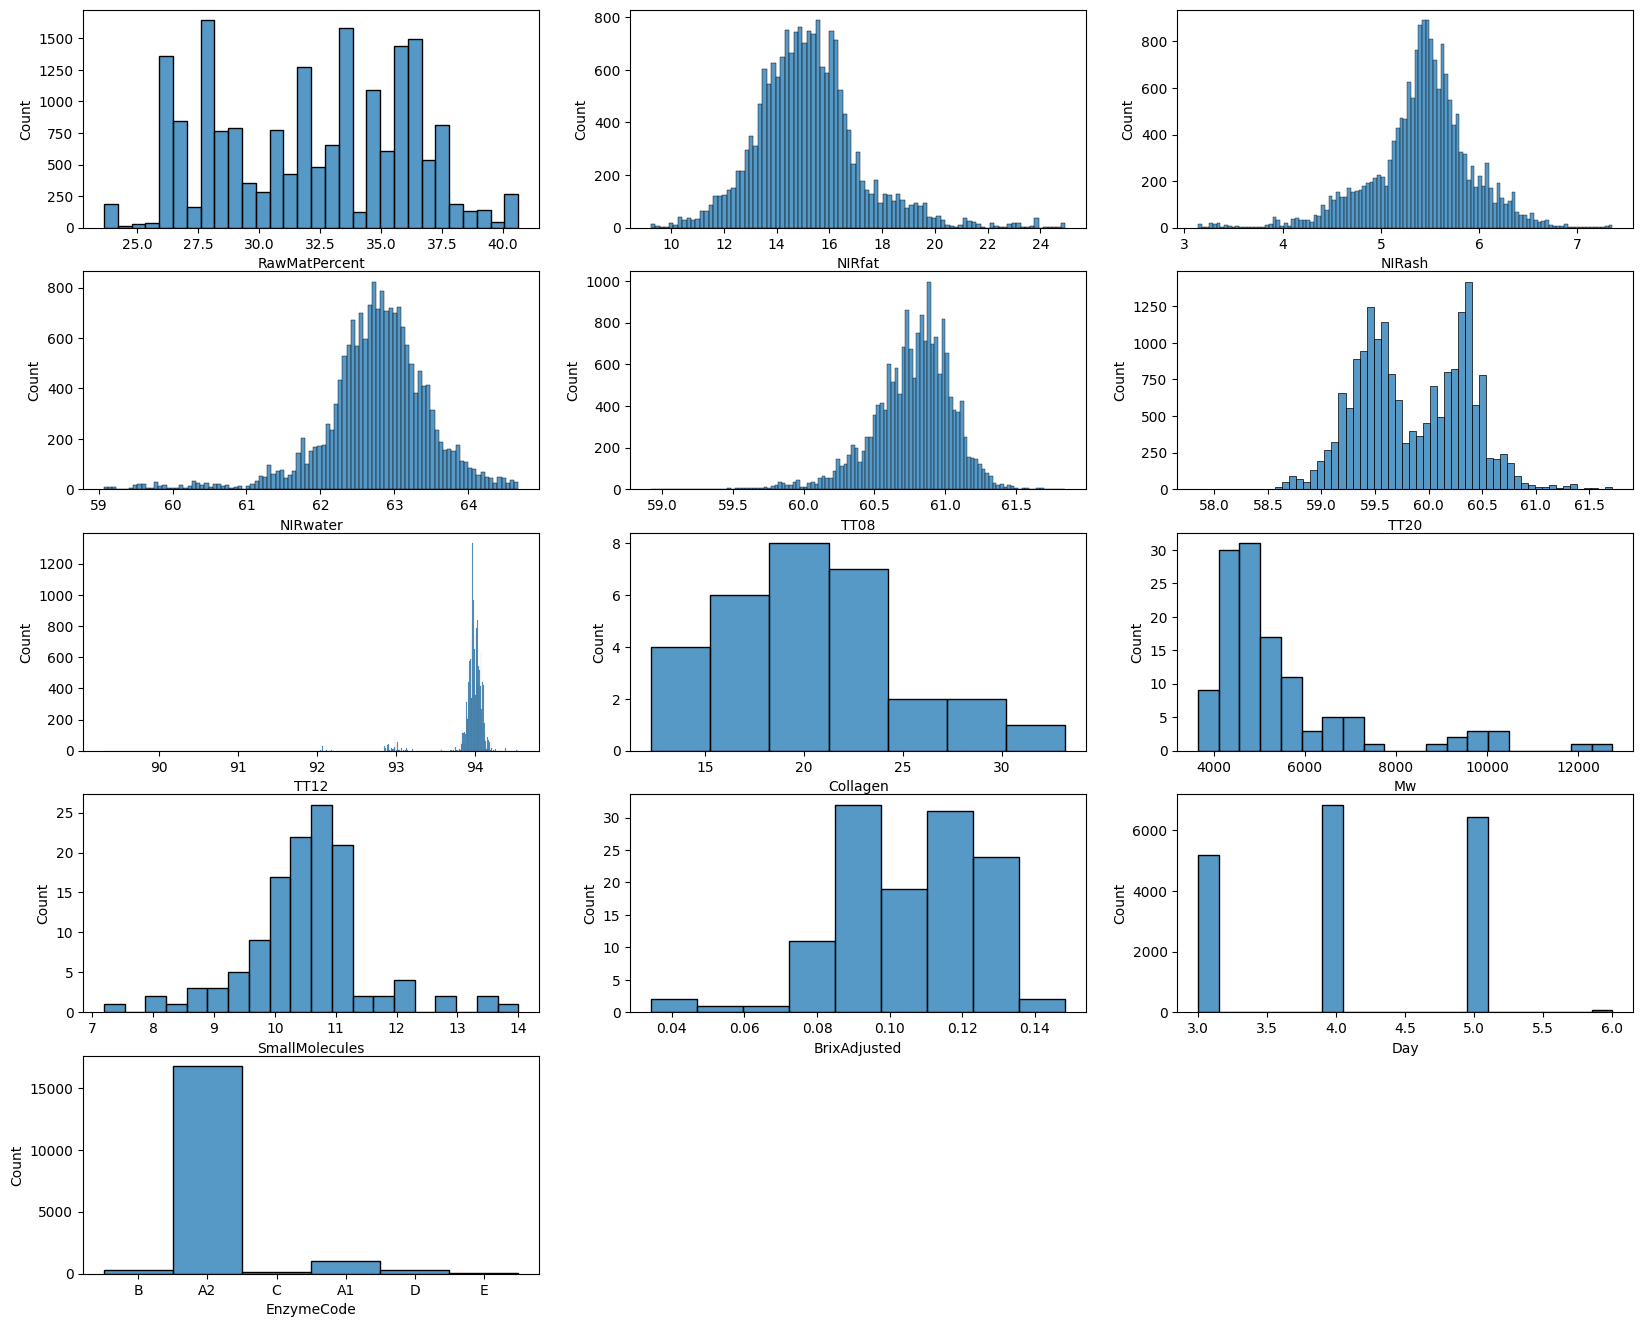

In [ ]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(behandlet_data_normalprod_enzym.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), behandlet_data_normalprod_enzym):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = behandlet_data_normalprod_enzym)
  i += 1

Fordeling av Enzymtyper i normal produksjon datasett

In [ ]:
# Fordelingen i "EnzymeCode"

frekvens = behandlet_data_normalprod_enzym['EnzymeCode'].value_counts()
andel = behandlet_data_normalprod_enzym['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2     16745  90.313360
A1      1001   5.398846
B        320   1.725905
D        270   1.456232
C        139   0.749690
E         66   0.355968


Fordeling i markert del av datasettet

In [ ]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_markert = behandlet_data_normalprod_enzym.dropna(subset=['Collagen'])

# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_markert = behandlet_data_normalprod_enzym.dropna(subset=['Mw',
                                                          'SmallMolecules',
                                                          'BrixAdjusted'])

Fordeling i normal produksjon datasett med Collagen som markert respons

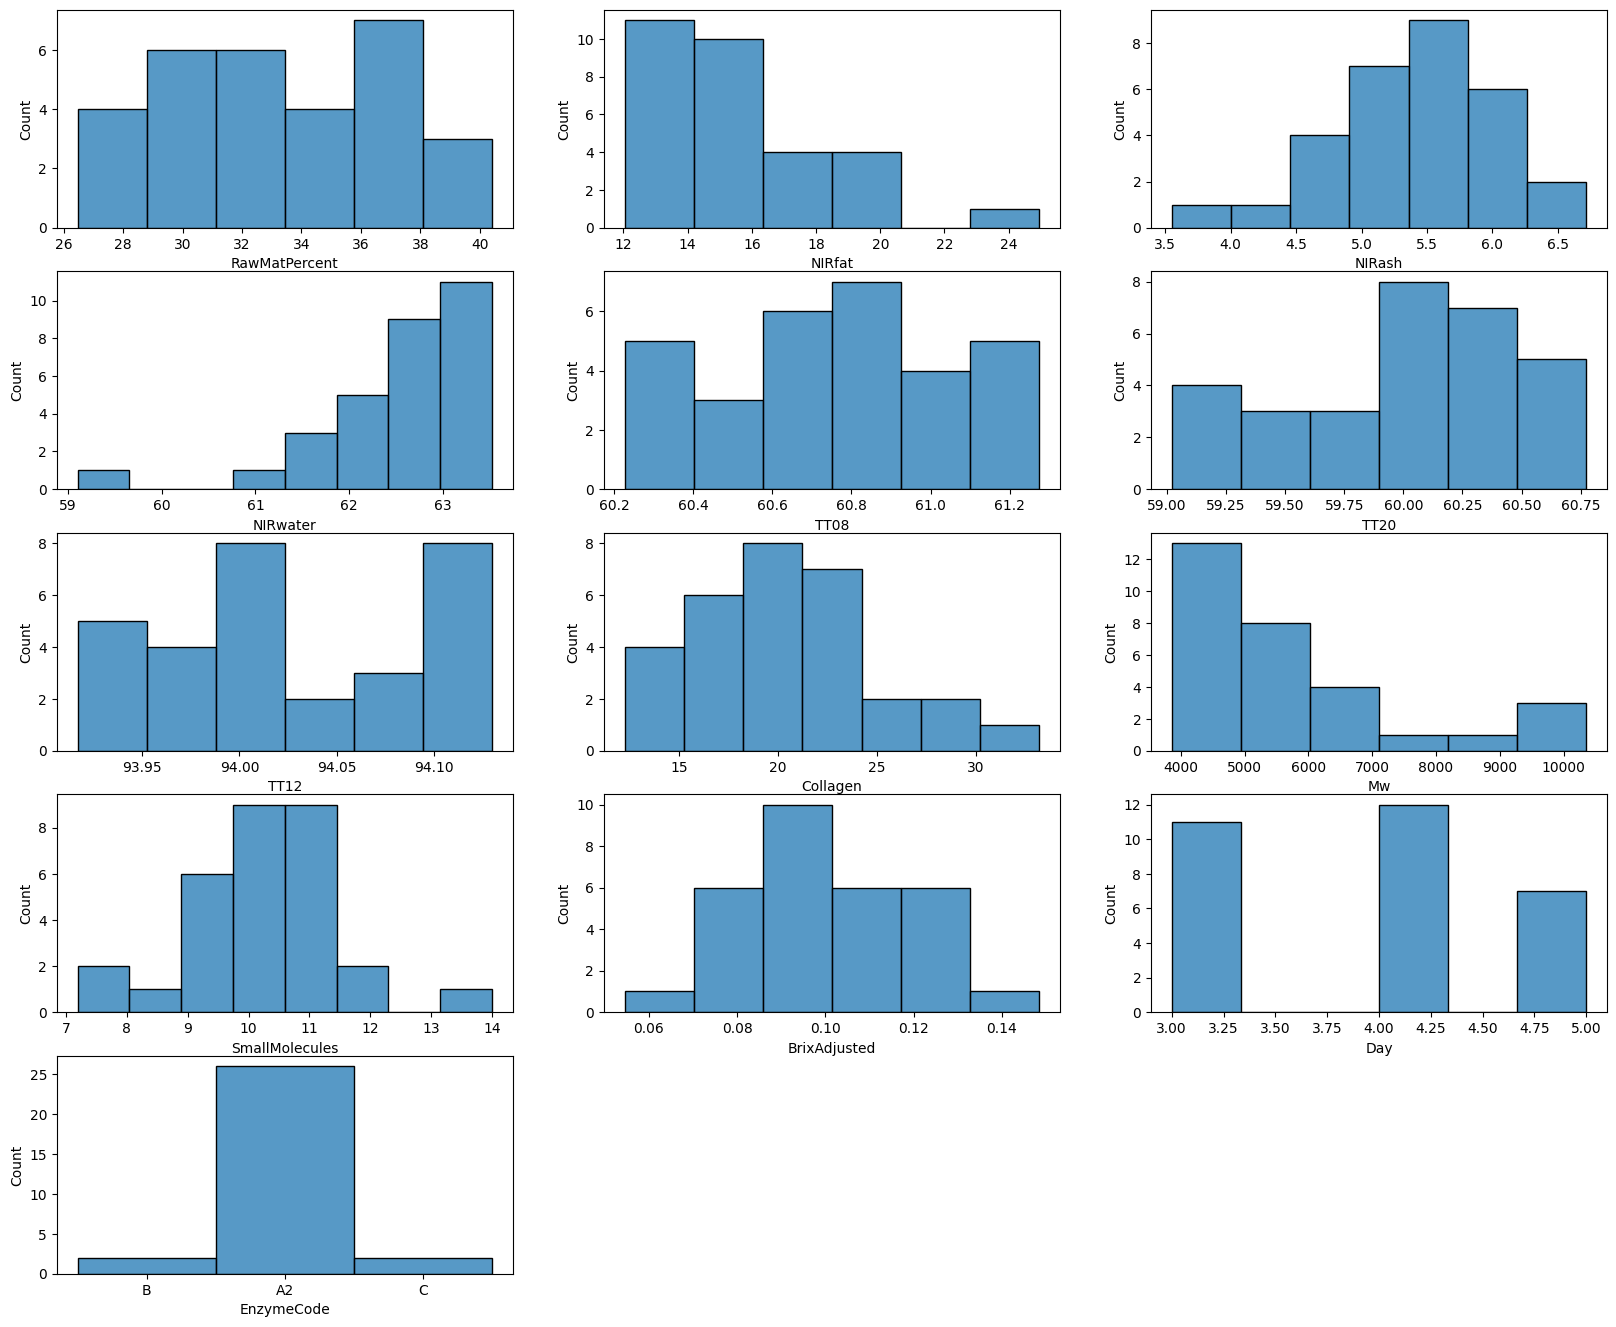

In [ ]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(collagen_markert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_markert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = collagen_markert)
  i += 1

Fordeling av Enzymtyper i normal produksjon datasett med Collagen som respons

In [ ]:
# Fordelingen i "EnzymeCode"

frekvens = collagen_markert['EnzymeCode'].value_counts()
andel = collagen_markert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2        26  86.666667
B          2   6.666667
C          2   6.666667


Fordeling i normal produksjon datasett med resterende kvalitetsmålinger som markert respons

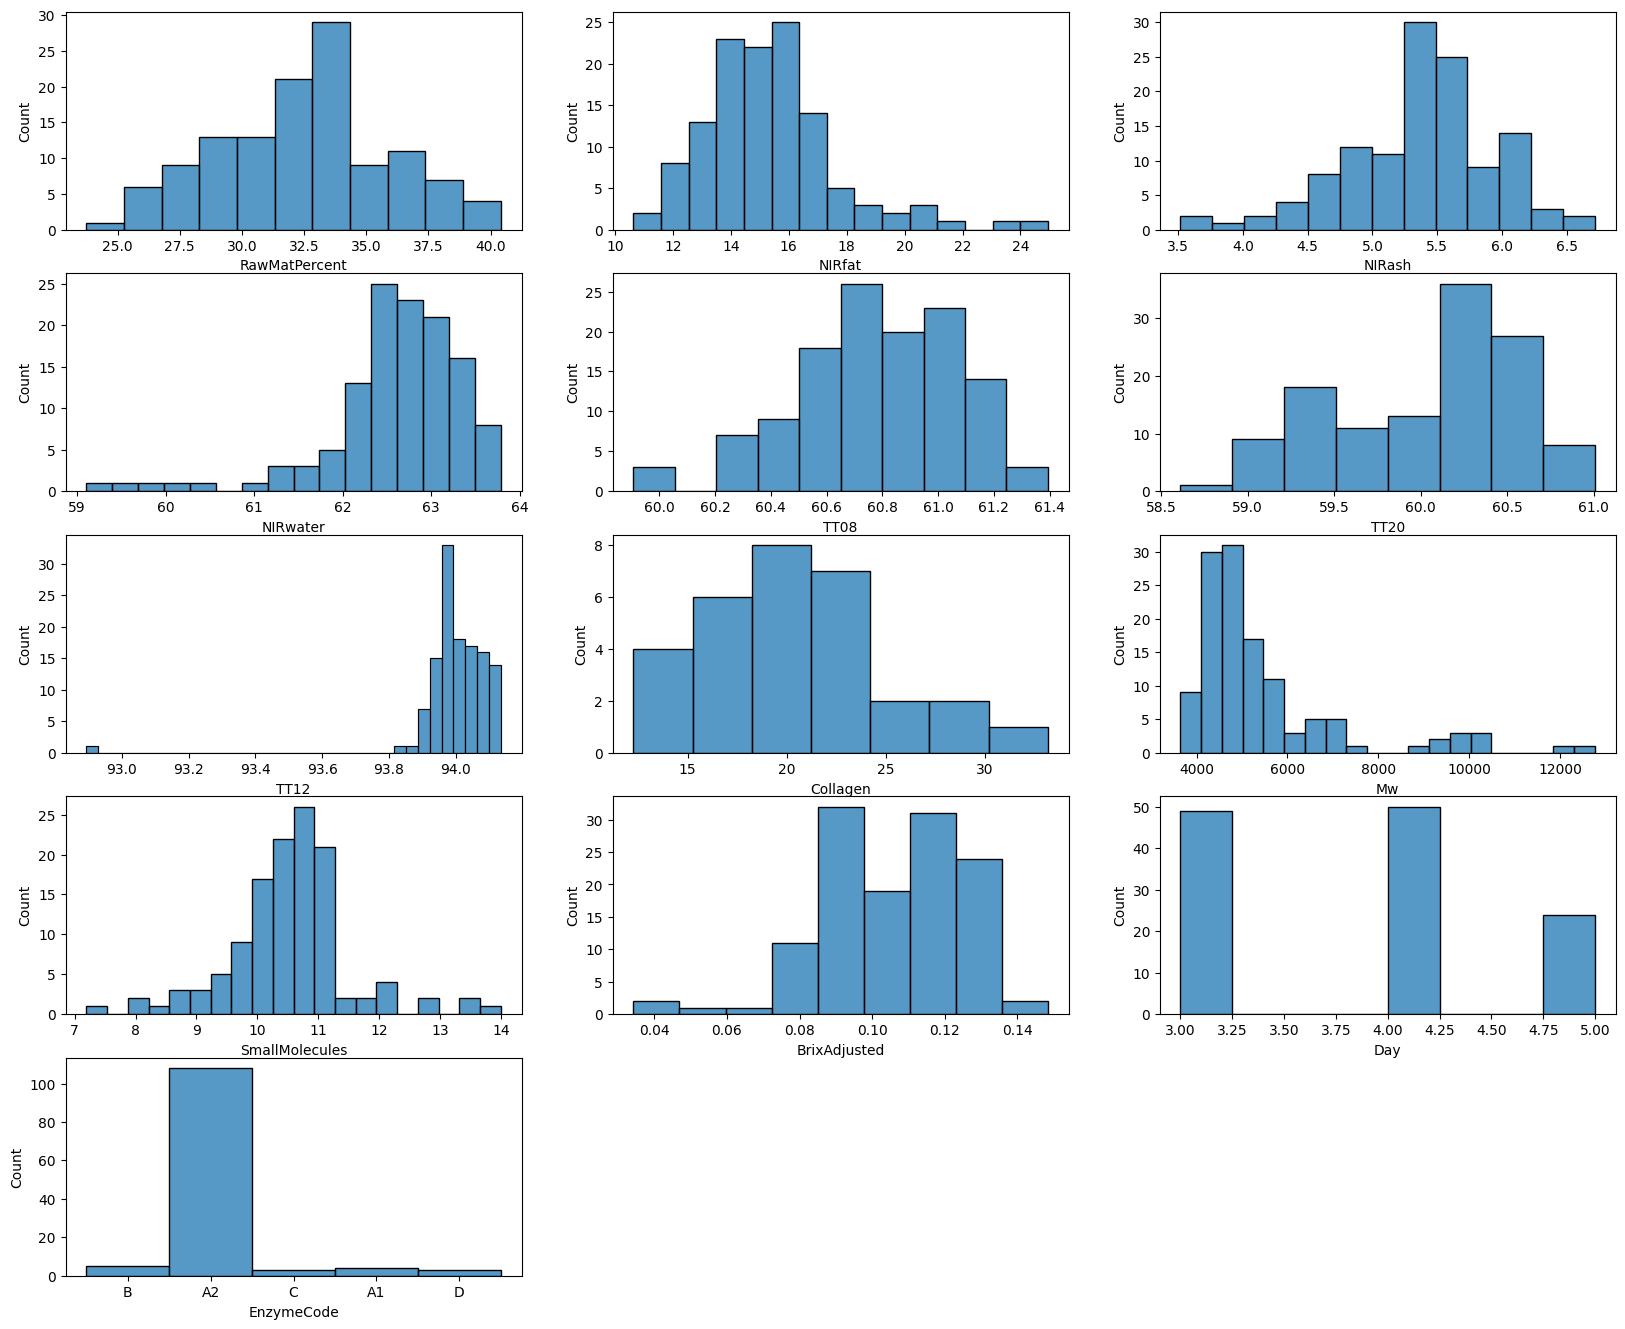

In [ ]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(kvalitetsmålinger_markert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_markert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = kvalitetsmålinger_markert)
  i += 1

Fordeling av Enzymtyper i normal produksjon datasett med andre kvalitetsmålinger som respons

In [ ]:
# Fordelingen i "EnzymeCode"

frekvens = kvalitetsmålinger_markert['EnzymeCode'].value_counts()
andel = kvalitetsmålinger_markert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2       108  87.804878
B          5   4.065041
A1         4   3.252033
C          3   2.439024
D          3   2.439024


Fordeling i umarkert del av datasettet

In [ ]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_umarkert = behandlet_data_normalprod_enzym[behandlet_data_normalprod_enzym['Collagen'].isna()]


# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_umarkert = behandlet_data_normalprod_enzym[behandlet_data_normalprod_enzym['Mw'].isna()]

Fordeling i datasett med Collagen som markert respons

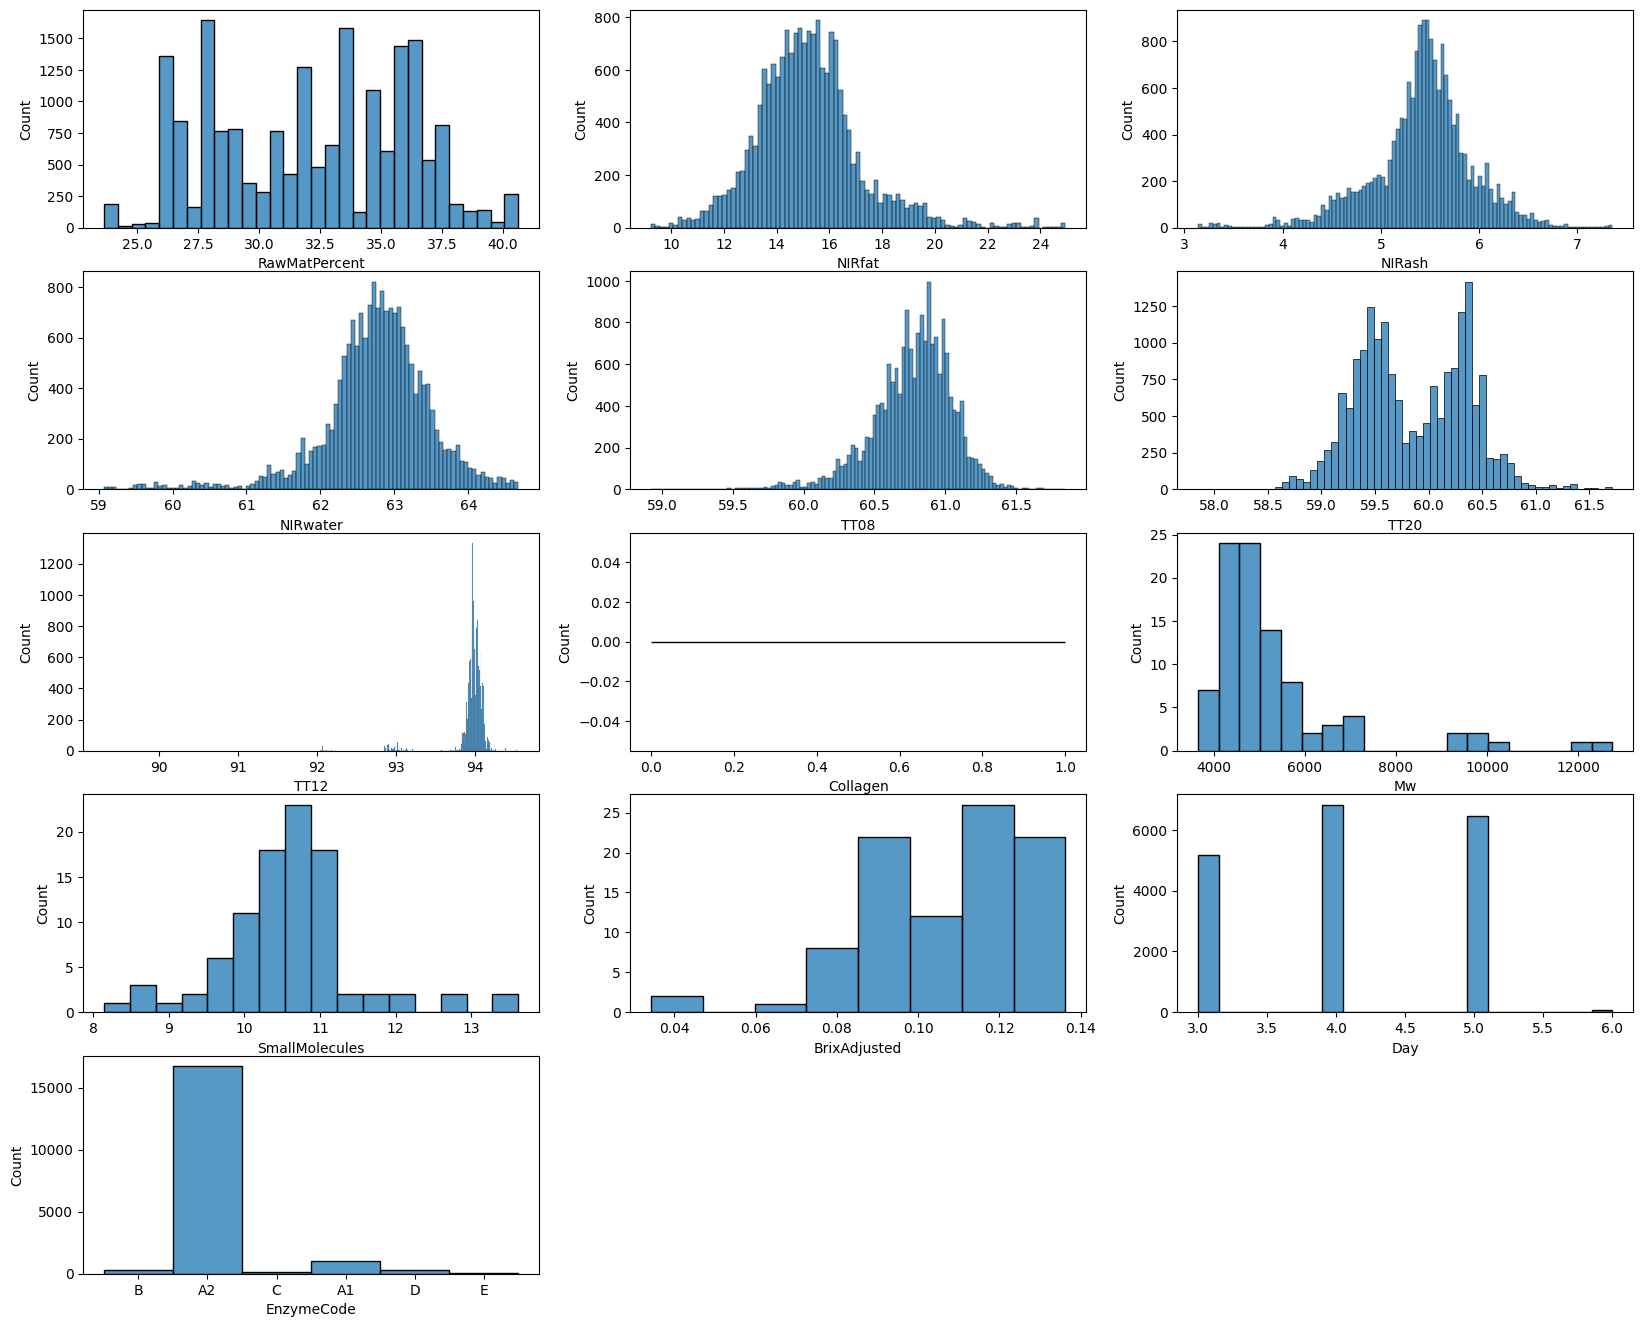

In [ ]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(collagen_umarkert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_umarkert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = collagen_umarkert)
  i += 1

Fordeling av Enzymtyper i datasett med Collagen som umarkert respons

In [ ]:
# Fordelingen i "EnzymeCode"

frekvens = collagen_umarkert['EnzymeCode'].value_counts()
andel = collagen_umarkert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2     16719  90.319270
A1      1001   5.407595
B        318   1.717897
D        270   1.458592
C        137   0.740100
E         66   0.356545


Fordeling i datasett med resterende kvalitetsmålinger som umarkert respons

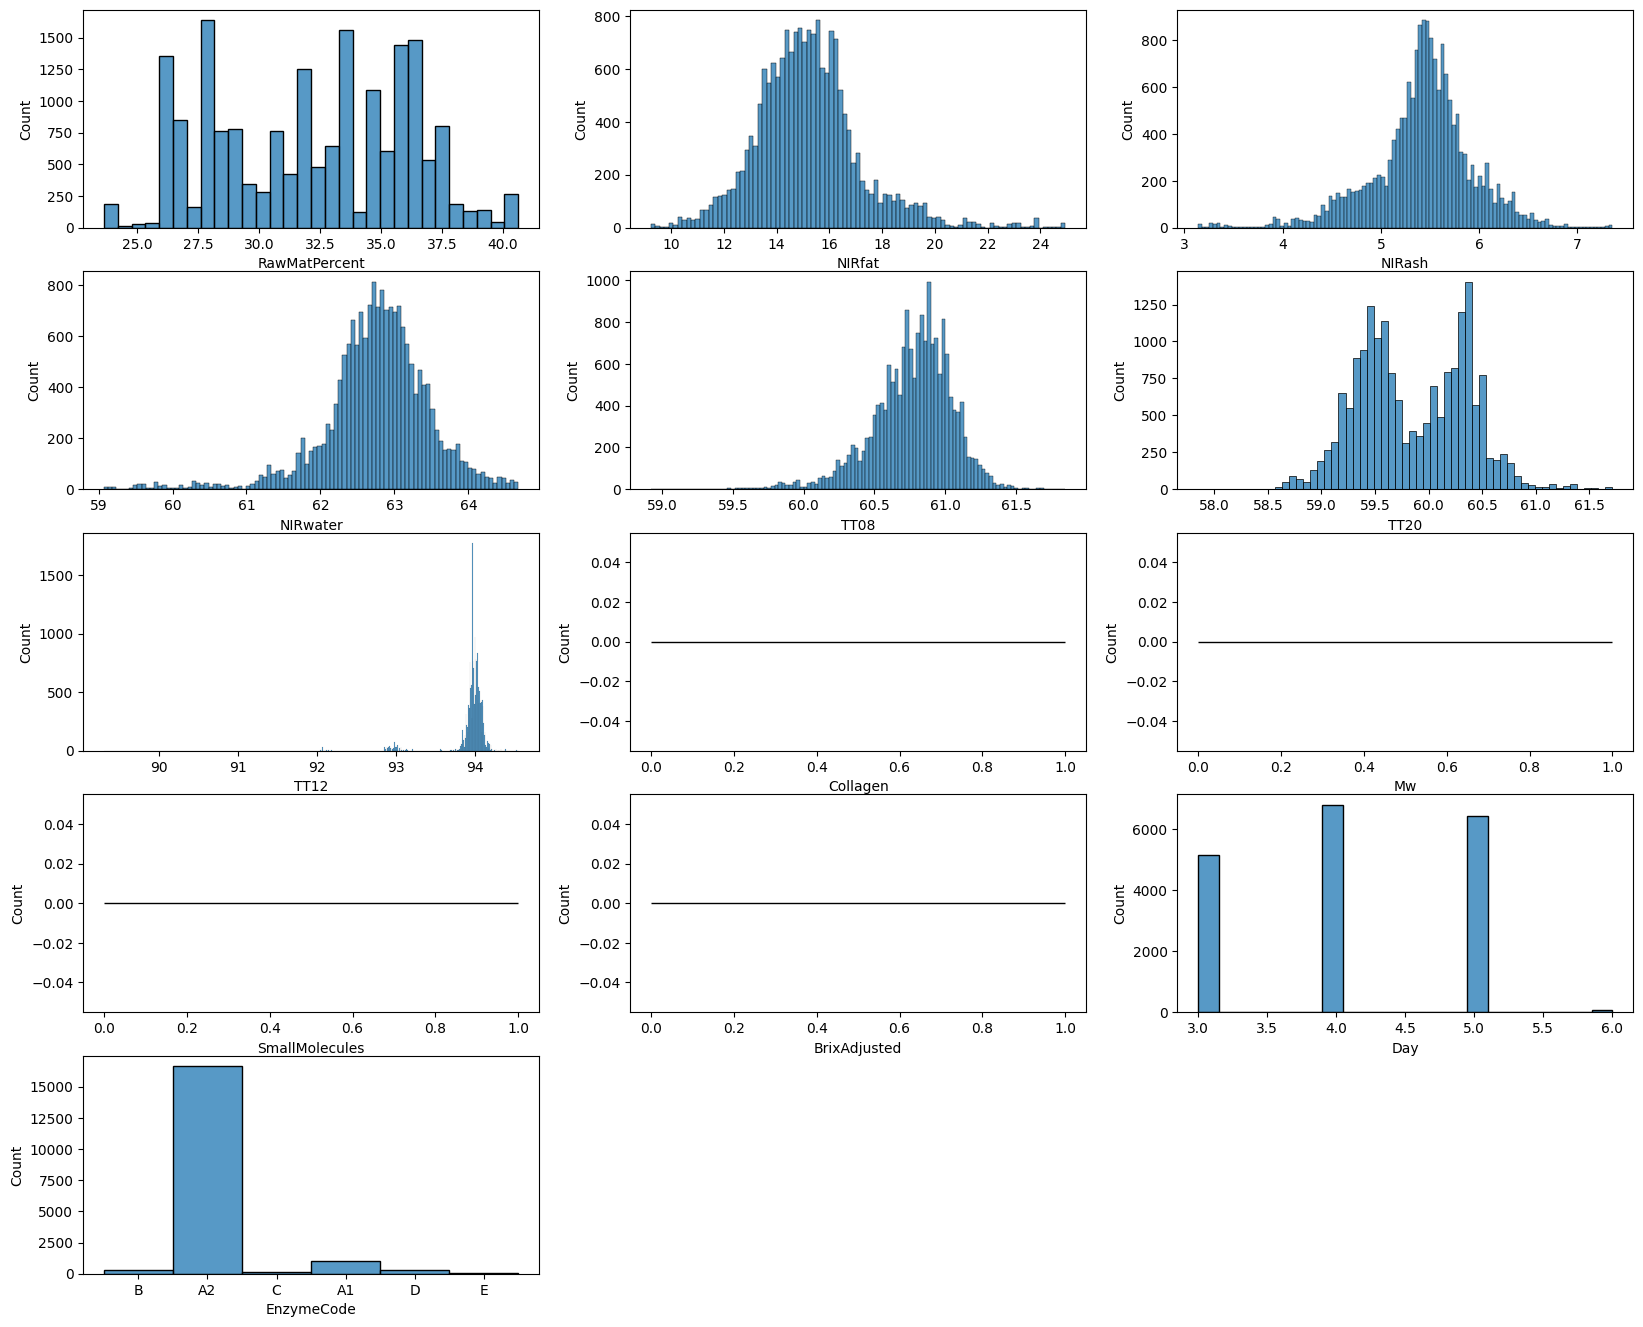

In [ ]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(kvalitetsmålinger_umarkert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_umarkert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = kvalitetsmålinger_umarkert)
  i += 1

Fordeling av Enzymtyper i datasett med andre kvalitetsmålinger som umarkert respons

In [ ]:
# Fordelingen i "EnzymeCode"

frekvens = kvalitetsmålinger_umarkert['EnzymeCode'].value_counts()
andel = kvalitetsmålinger_umarkert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2     16637  90.330112
A1       997   5.413183
B        315   1.710283
D        267   1.449669
C        136   0.738408
E         66   0.358345


# Dataforståelse av behandlet datasett: Design produksjon

Oppdeling av data for hver kvalitetsmåling under design produksjon

In [ ]:
behandlet_data_designprod = copy.deepcopy(behandlet_data)
behandlet_data_designprod['Day'] = (behandlet_data_designprod.index.isocalendar().day)

# Ekskluderer de dager med "design"-produksjon
behandlet_data_designprod = behandlet_data_designprod[~behandlet_data_designprod['Day'].isin([3,4,5,6])]

enzym_data = rå_data.merge(behandlet_data_designprod,
                           left_index=True,
                           right_index=True,
                           how='inner',
                           suffixes=('','_drop'))['EnzymeCode']

behandlet_data_designprod_enzym = pd.concat([behandlet_data_designprod, enzym_data], axis=1)
behandlet_data_designprod_enzym = behandlet_data_designprod_enzym.iloc[:, 6:]

In [ ]:
behandlet_data_designprod_enzym.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10506 entries, 2022-10-31 17:37:00 to 2023-06-13 23:59:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RawMatPercent   10506 non-null  float64
 1   NIRfat          10506 non-null  float64
 2   NIRash          10506 non-null  float64
 3   NIRwater        10506 non-null  float64
 4   TT08            10506 non-null  float64
 5   TT20            10506 non-null  float64
 6   TT12            10506 non-null  float64
 7   Collagen        57 non-null     float64
 8   Mw              335 non-null    float64
 9   SmallMolecules  335 non-null    float64
 10  BrixAdjusted    335 non-null    float64
 11  Day             10506 non-null  UInt32 
 12  EnzymeCode      10506 non-null  object 
dtypes: UInt32(1), float64(11), object(1)
memory usage: 1.3+ MB


Fordeling i variablene datasett med design produksjon

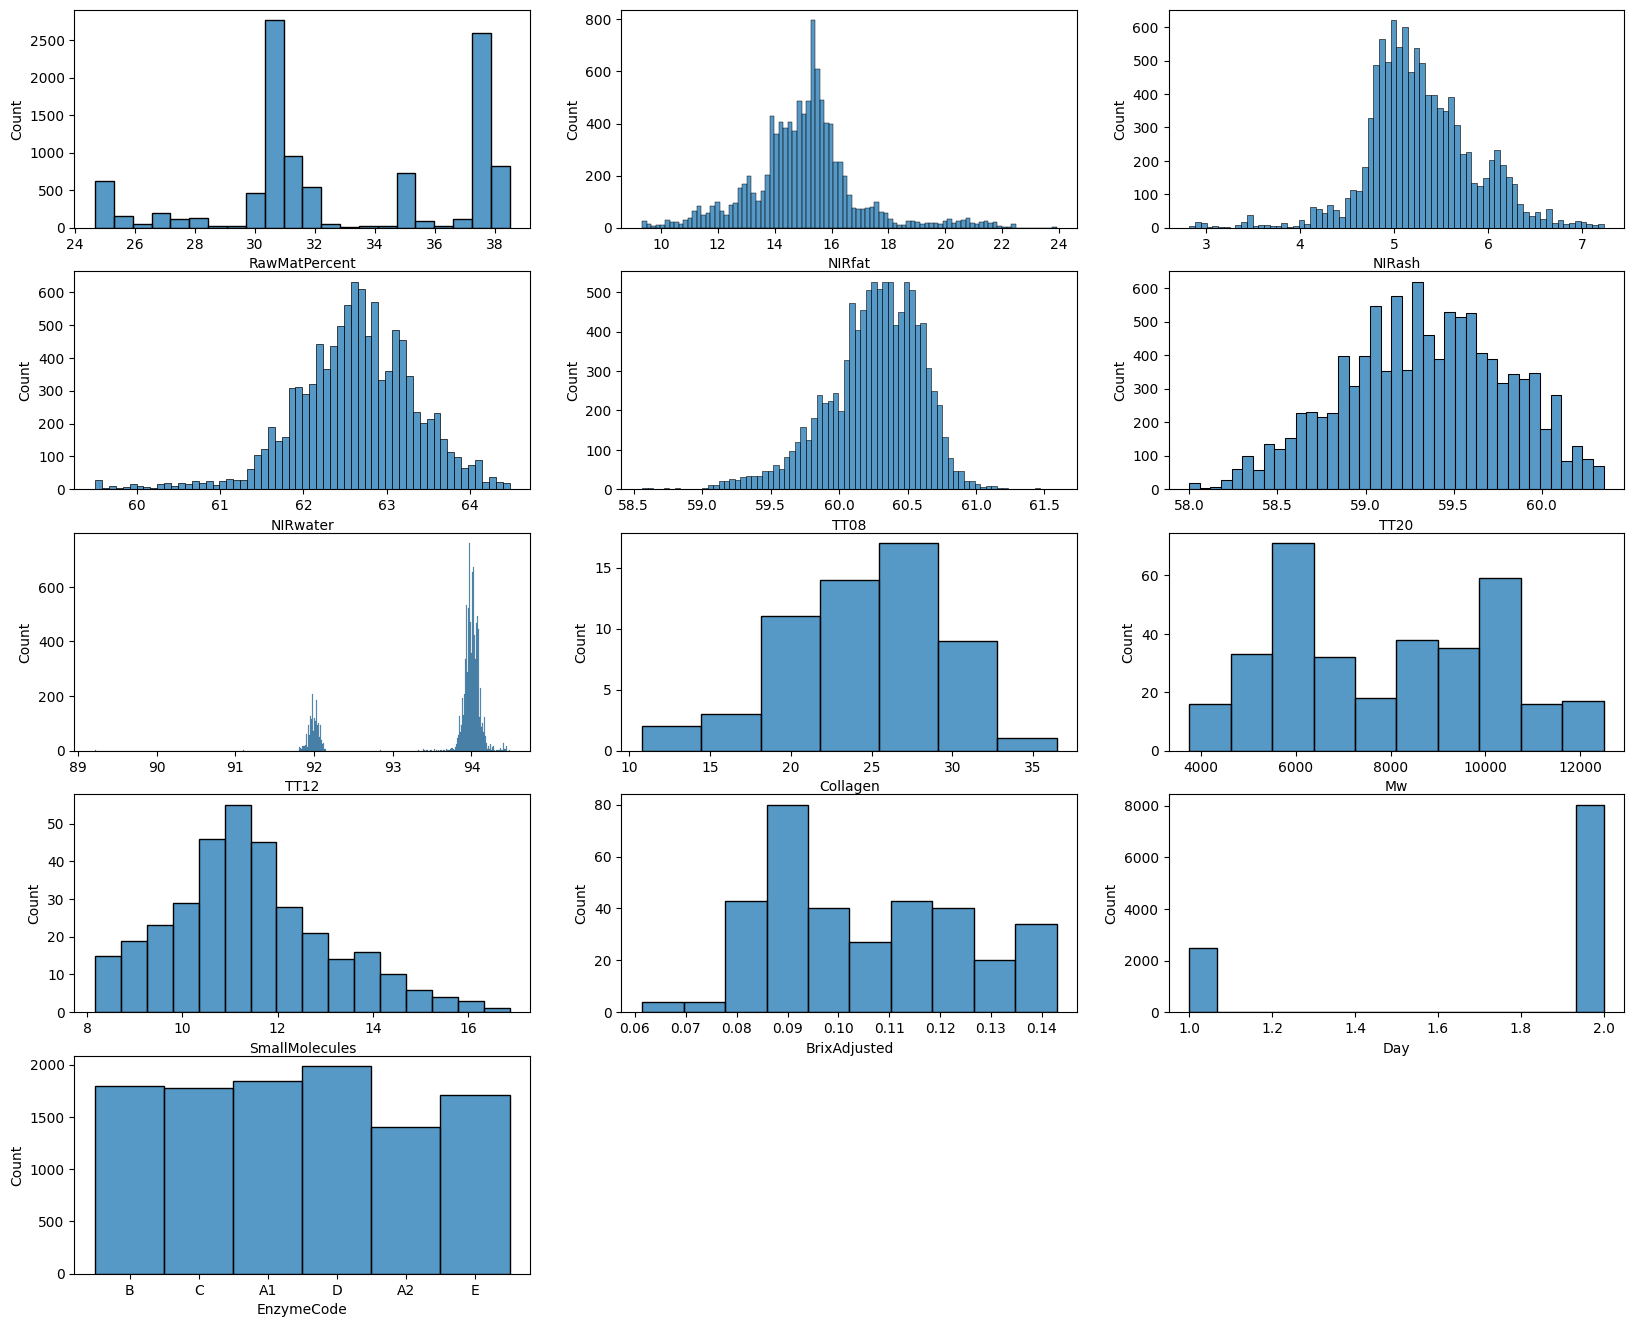

In [ ]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(behandlet_data_designprod_enzym.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), behandlet_data_designprod_enzym):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = behandlet_data_designprod_enzym)
  i += 1

Fordeling av Enzymtyper i normal produksjon datasett

In [ ]:
# Fordelingen i "EnzymeCode"

frekvens = behandlet_data_designprod_enzym['EnzymeCode'].value_counts()
andel = behandlet_data_designprod_enzym['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

enzymtyper_data

,Frekvens,Andel
D,1986,18.903484
A1,1844,17.551875
B,1793,17.066438
C,1777,16.914144
E,1706,16.238340
A2,1400,13.325719


Fordeling i markert del av datasettet

In [ ]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_markert = behandlet_data_designprod_enzym.dropna(subset=['Collagen'])

# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_markert = behandlet_data_designprod_enzym.dropna(subset=['Mw',
                                                          'SmallMolecules',
                                                          'BrixAdjusted'])

Fordeling i design produksjon datasett med Collagen som markert respons

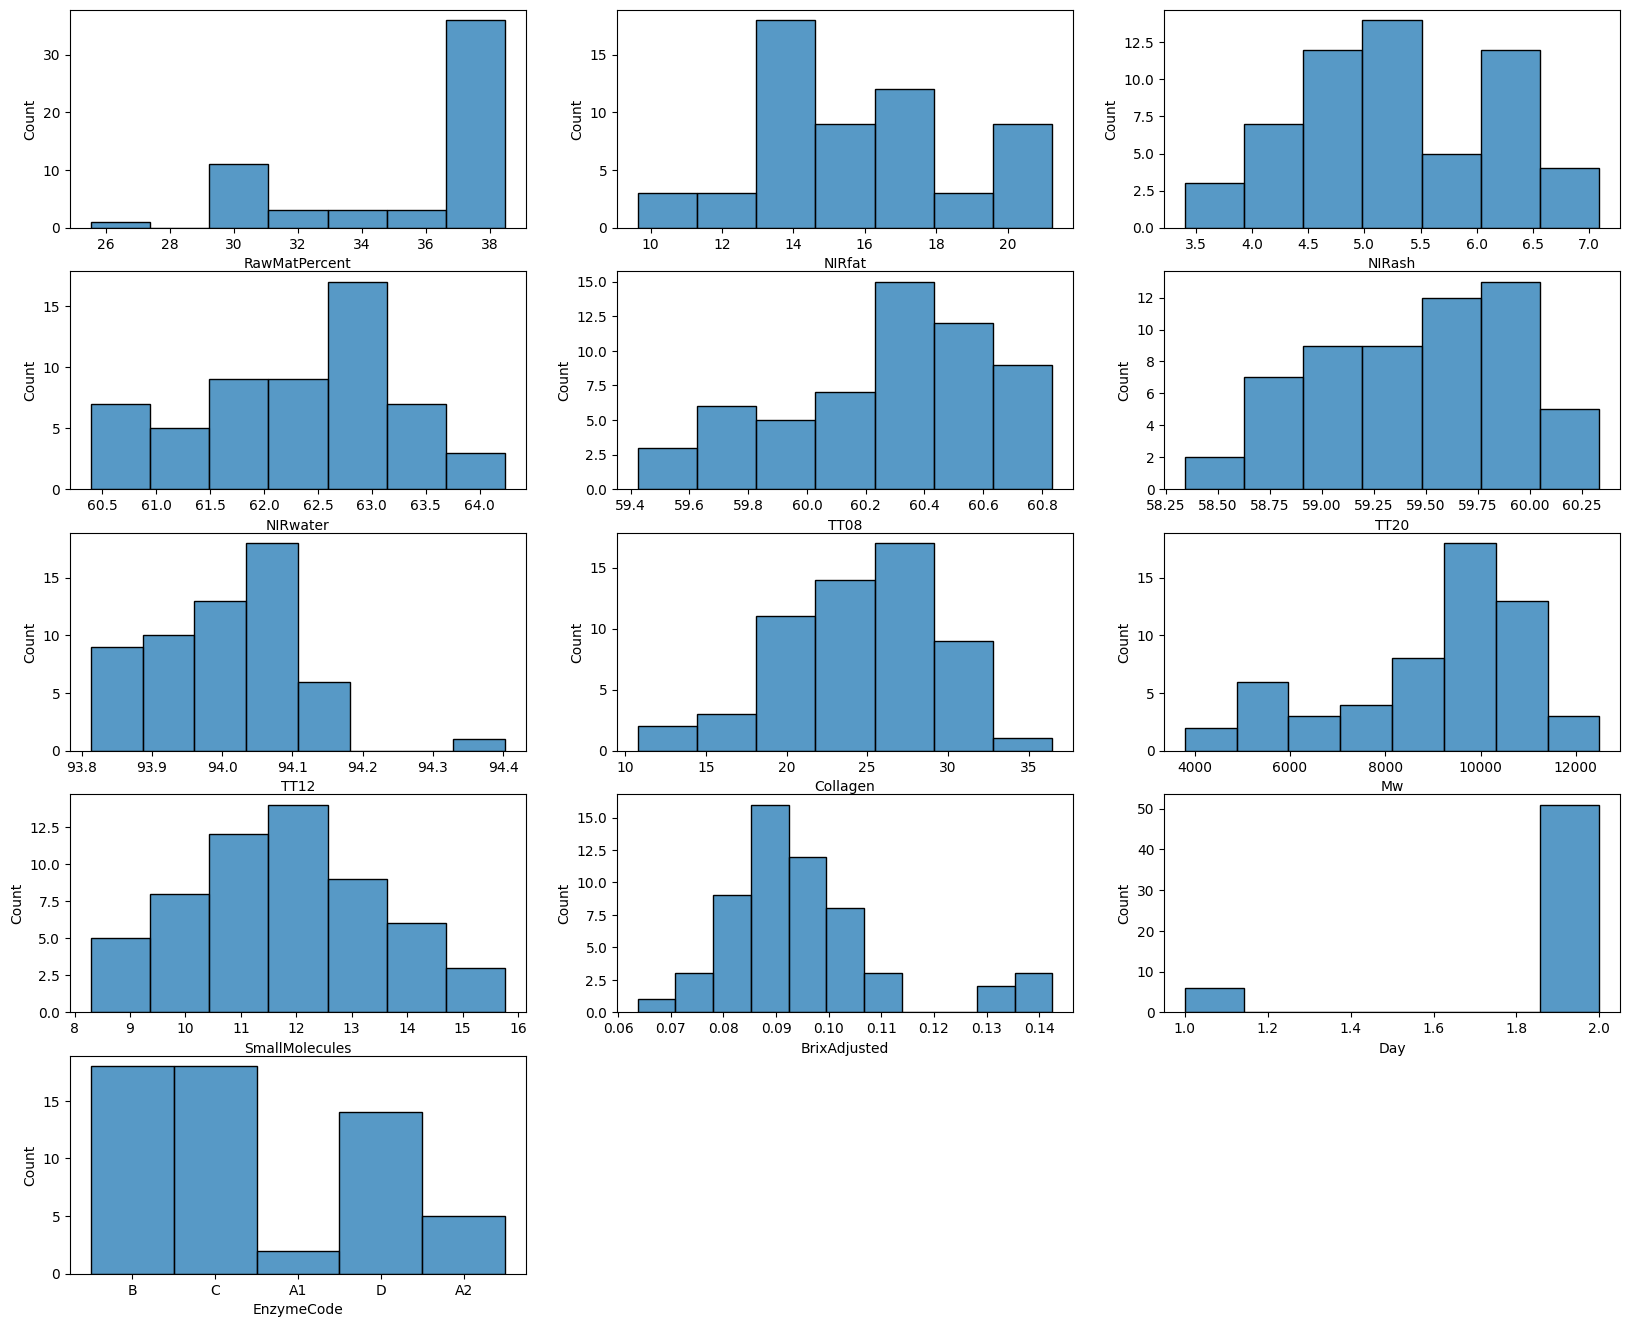

In [ ]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(collagen_markert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_markert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = collagen_markert)
  i += 1

Fordeling av Enzymtyper i design produksjon datasett med Collagen som respons

In [ ]:
# Fordelingen i "EnzymeCode"

frekvens = collagen_markert['EnzymeCode'].value_counts()
andel = collagen_markert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
B         18  31.578947
C         18  31.578947
D         14  24.561404
A2         5   8.771930
A1         2   3.508772


Fordeling i design produksjon datasett med resterende kvalitetsmålinger som markert respons

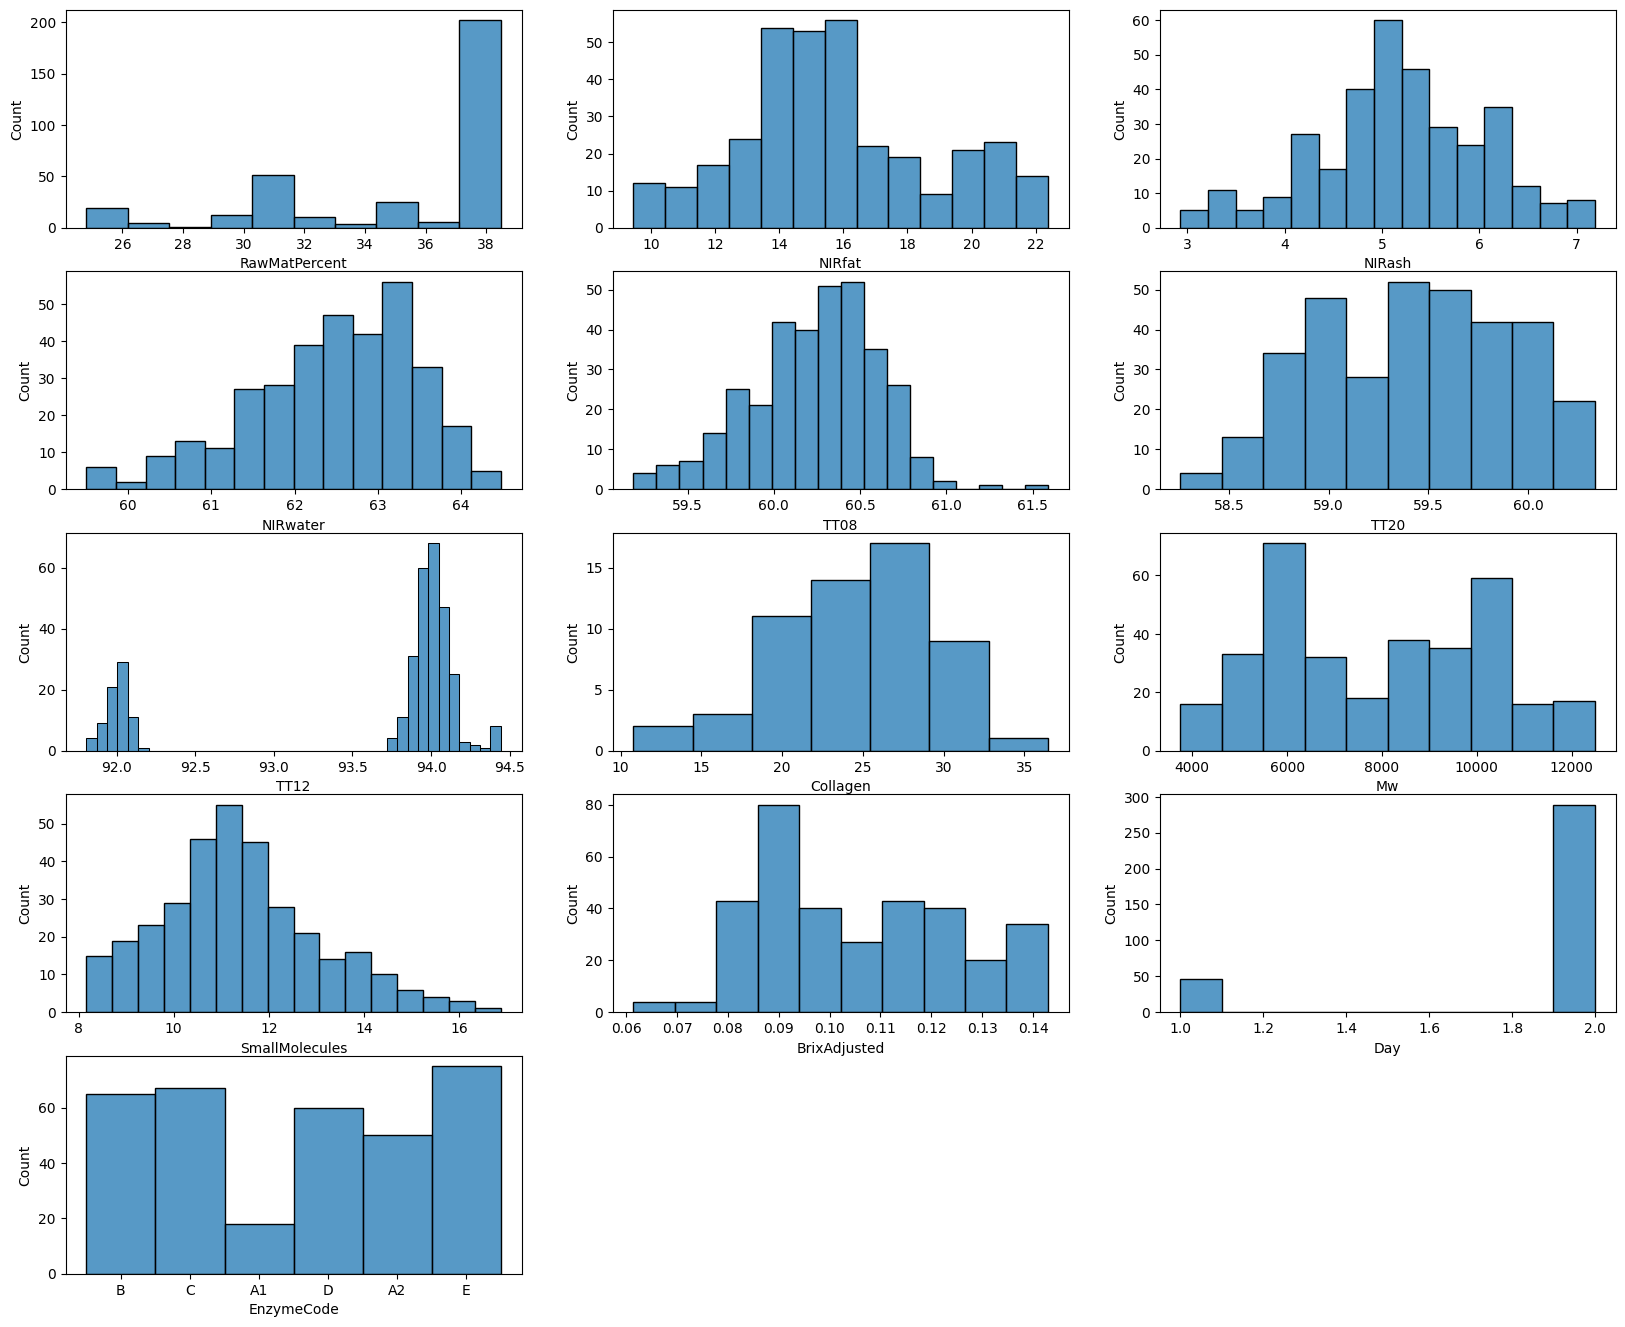

In [ ]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(kvalitetsmålinger_markert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_markert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = kvalitetsmålinger_markert)
  i += 1

Fordeling av Enzymtyper i normal produksjon datasett med andre kvalitetsmålinger som respons

In [ ]:
# Fordelingen i "EnzymeCode"

frekvens = kvalitetsmålinger_markert['EnzymeCode'].value_counts()
andel = kvalitetsmålinger_markert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})
enzymtyper_data

,Frekvens,Andel
E,75,22.388060
C,67,20.000000
B,65,19.402985
D,60,17.910448
A2,50,14.925373
A1,18,5.373134


Fordeling i umarkert del av datasettet

In [ ]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_umarkert = behandlet_data_designprod_enzym[behandlet_data_designprod_enzym['Collagen'].isna()]


# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_umarkert = behandlet_data_designprod_enzym[behandlet_data_designprod_enzym['Mw'].isna()]

Fordeling i datasett med Collagen som umarkert respons

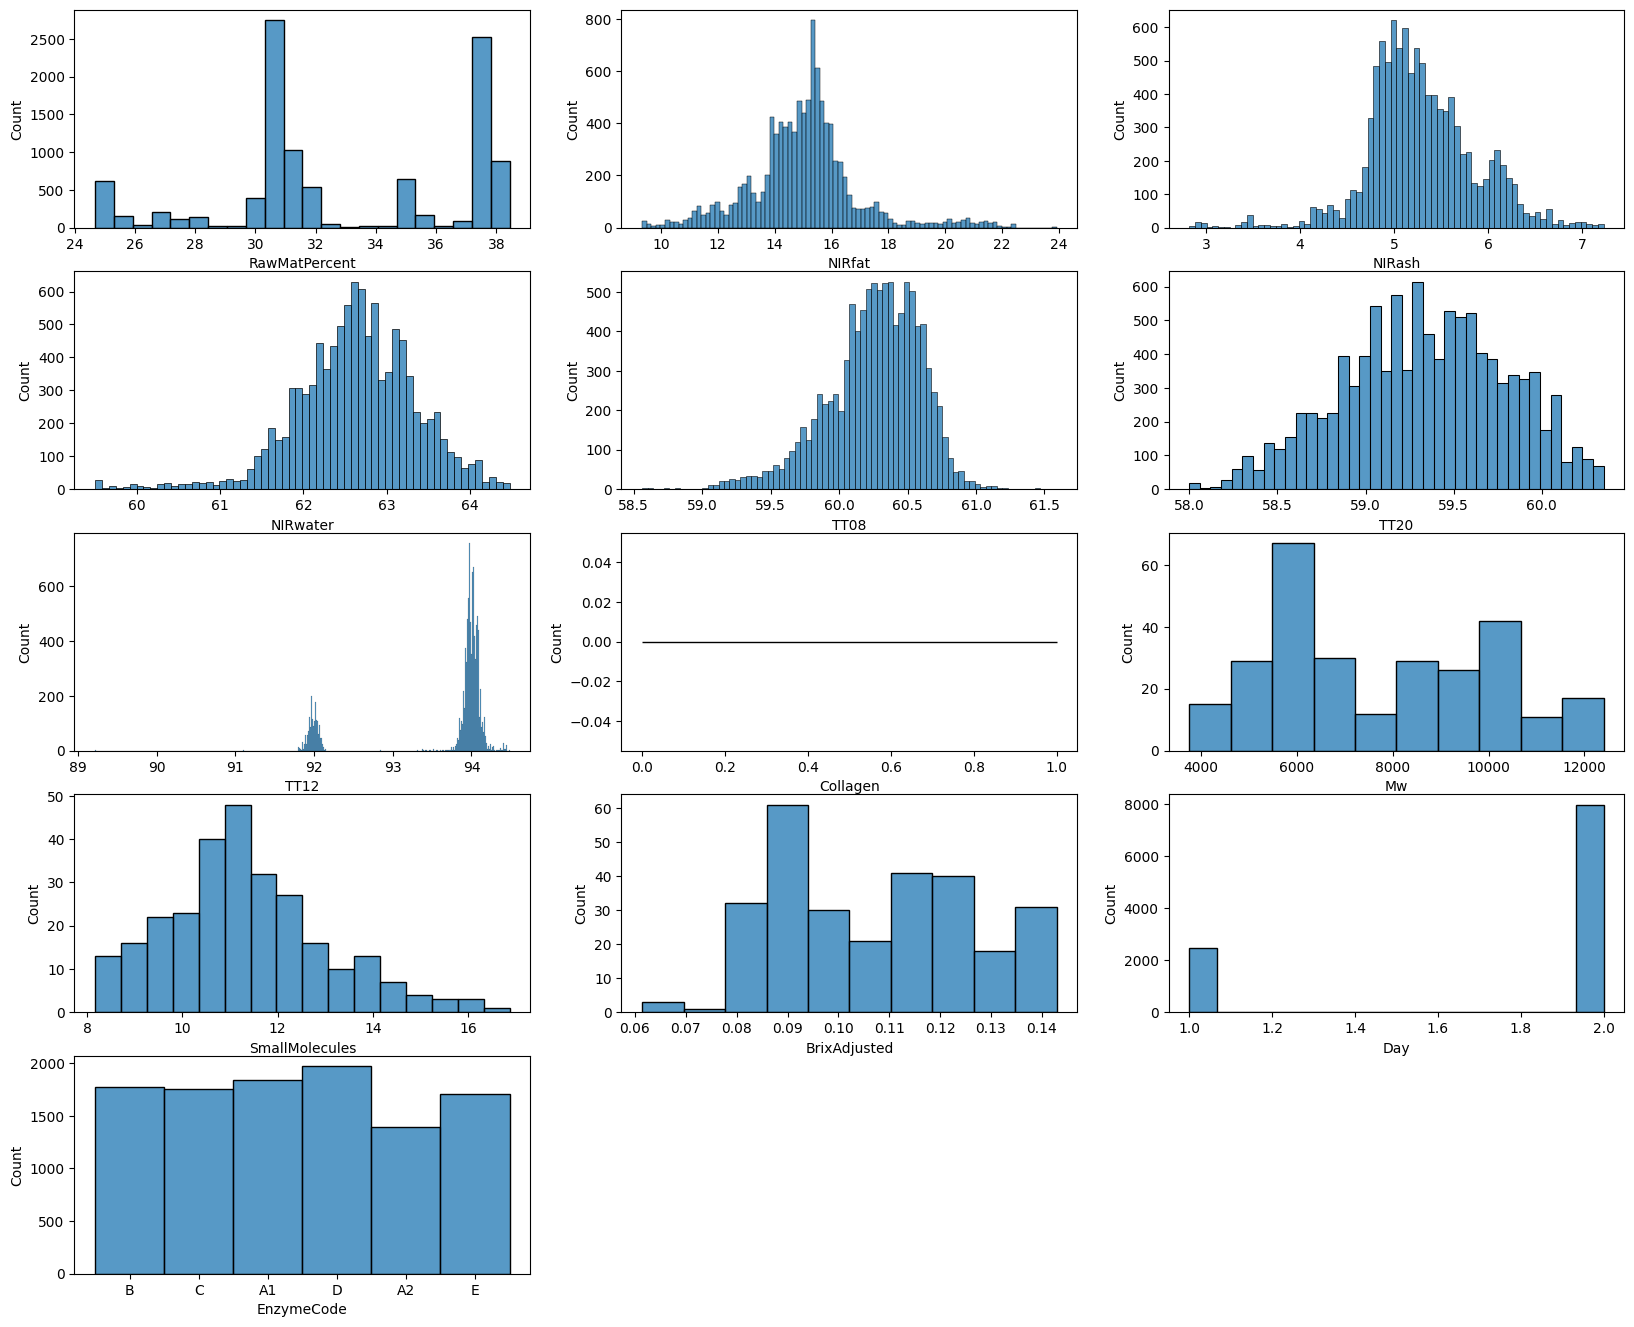

In [ ]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(collagen_umarkert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_umarkert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = collagen_umarkert)
  i += 1

Fordeling av Enzymtyper i datasett med Collagen som umarkert respons

In [ ]:
# Fordelingen i "EnzymeCode"

frekvens = collagen_umarkert['EnzymeCode'].value_counts()
andel = collagen_umarkert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
D       1972  18.872619
A1      1842  17.628481
B       1775  16.987272
C       1759  16.834147
E       1706  16.326921
A2      1395  13.350560


Fordeling i datasett med resterende kvalitetsmålinger som umarkert respons

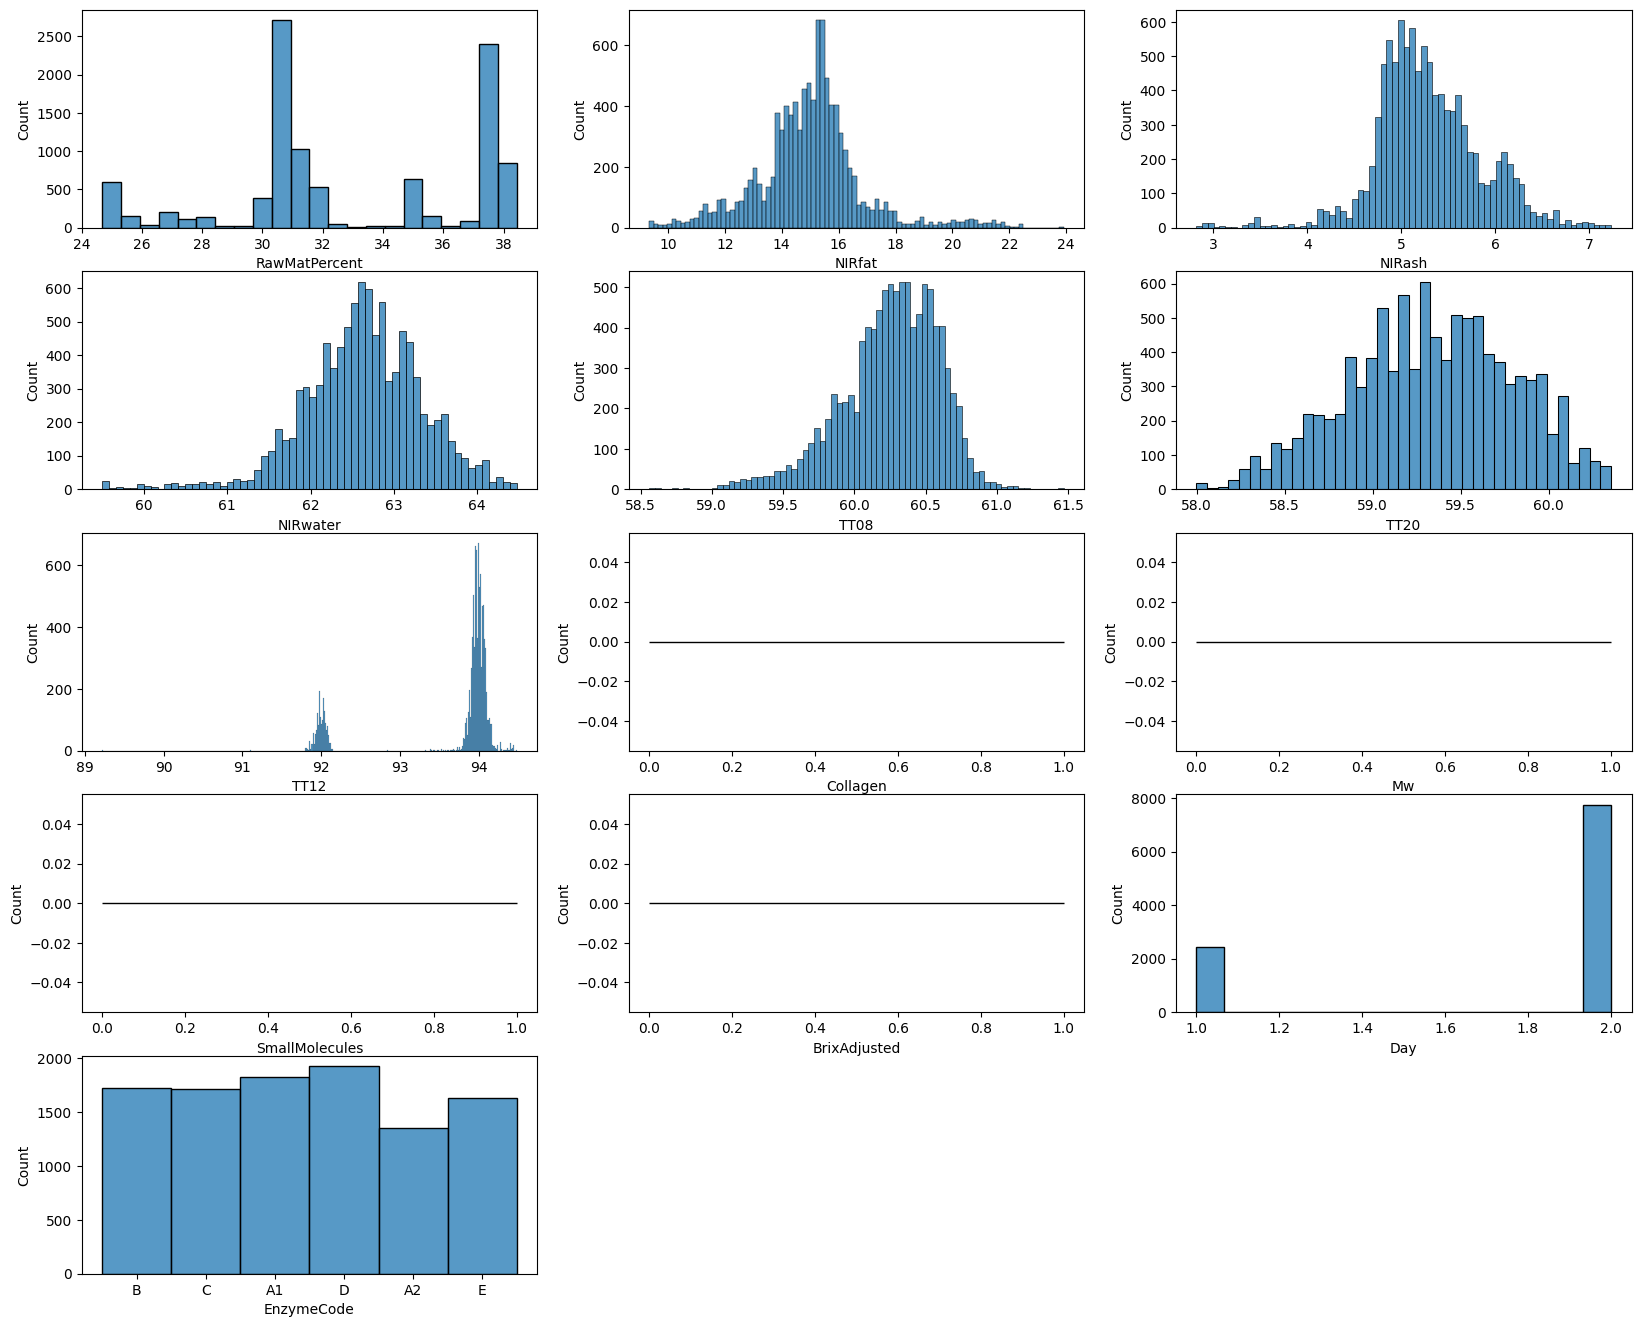

In [ ]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(kvalitetsmålinger_umarkert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_umarkert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = kvalitetsmålinger_umarkert)
  i += 1

Fordeling av Enzymtyper i datasett med andre kvalitetsmålinger som umarkert respons

In [ ]:
# Fordelingen i "EnzymeCode"

frekvens = kvalitetsmålinger_umarkert['EnzymeCode'].value_counts()
andel = kvalitetsmålinger_umarkert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})
enzymtyper_data

,Frekvens,Andel
D,1926,18.936191
A1,1826,17.953004
B,1728,16.989480
C,1710,16.812506
E,1631,16.035788
A2,1350,13.273031


# Oppdeling av datasett

Oppdeling av data for hver kvalitetsmåling

In [ ]:
# Lager en kopi av datasett med en kvalitesmåling som respons hver
collagen_data = behandlet_data.drop(columns=['Mw',
                                             'SmallMolecules',
                                             'BrixAdjusted'])

mw_data = behandlet_data.drop(columns=['Collagen',
                                       'SmallMolecules',
                                       'BrixAdjusted'])

smallmoleclues_data = behandlet_data.drop(columns=['Collagen',
                                                   'Mw',
                                                   'BrixAdjusted'])

brixadjusted_data = behandlet_data.drop(columns=['Collagen',
                                                 'Mw',
                                                 'SmallMolecules'])

Oppdeling av data for hver kvalitetsmåling (normal produksjon)

In [ ]:
# Eksluderer kolonne "Day" fra datasettet
behandlet_data_normalprod.drop(columns= ["Day"], inplace = True)

# Lager en kopi av datasett med en kvalitesmåling under normalproduksjon
# som respons hver
collagen_data_normal = behandlet_data_normalprod.drop(columns=['Mw',
                                                               'SmallMolecules',
                                                               'BrixAdjusted'])

mw_data_normal = behandlet_data_normalprod.drop(columns=['Collagen',
                                                         'SmallMolecules',
                                                         'BrixAdjusted'])

smallmoleclues_data_normal = behandlet_data_normalprod.drop(columns=['Collagen',
                                                                     'Mw',
                                                                     'BrixAdjusted'])

brixadjusted_data_normal = behandlet_data_normalprod.drop(columns=['Collagen',
                                                                   'Mw',
                                                                   'SmallMolecules'])

Oppdeling av data for hver kvalitetsmåling (design produksjon)

In [ ]:
# Eksluderer kolonne "Day" fra datasettet
behandlet_data_designprod.drop(columns= ["Day"], inplace = True)

# Lager en kopi av datasett med en kvalitesmåling under normalproduksjon
# som respons hver
collagen_data_design = behandlet_data_designprod.drop(columns=['Mw',
                                                               'SmallMolecules',
                                                               'BrixAdjusted'])

mw_data_design = behandlet_data_designprod.drop(columns=['Collagen',
                                                         'SmallMolecules',
                                                         'BrixAdjusted'])

smallmoleclues_data_design = behandlet_data_designprod.drop(columns=['Collagen',
                                                                     'Mw',
                                                                     'BrixAdjusted'])

brixadjusted_data_design = behandlet_data_designprod.drop(columns=['Collagen',
                                                                   'Mw',
                                                                   'SmallMolecules'])

Lagring av alle datasett som csv filer

In [ ]:
collagen_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/collagen_data.csv')
mw_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/mw_data.csv')
smallmoleclues_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/smallmoleclues_data.csv')
brixadjusted_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/brixadjusted_data.csv')

collagen_data_normal.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/collagen_data_normal.csv')
mw_data_normal.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/mw_data_normal.csv')
smallmoleclues_data_normal.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/smallmoleclues_data_normal.csv')
brixadjusted_data_normal.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/brixadjusted_data_normal.csv')

collagen_data_design.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/collagen_data_design.csv')
mw_data_design.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/mw_data_design.csv')
smallmoleclues_data_design.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/smallmoleclues_data_design.csv')
brixadjusted_data_design.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/brixadjusted_data_design.csv')